# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhamad Furqon Al-Haqqi
- **Email:** alhaqqi123@gmail.com
- **ID Dicoding:** frqn_c

## Menentukan Pertanyaan Bisnis

1. What is the total revenue generated from sales over time?
2. What are the trends in purchases (by revenue)?
3. What are the trends in purchases (by order number)?
4. Which product categories contribute the most to revenue?
5. Which product categories is the most selling?
6. Which states or cities have the highest number of orders?
7. What is the distribution of payment methods used by customers?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data Wrangling

### Gathering Data

In [2]:
dataset_path = 'data/E-Commerce Public Dataset/'

# load all the datasets
customers_df = pd.read_csv(dataset_path + 'customers_dataset.csv')
geolocation_df = pd.read_csv(dataset_path + 'geolocation_dataset.csv')
order_items_df = pd.read_csv(dataset_path + 'order_items_dataset.csv')
order_payments_df = pd.read_csv(dataset_path + 'order_payments_dataset.csv')
order_reviews_df = pd.read_csv(dataset_path + 'order_reviews_dataset.csv')
orders_df = pd.read_csv(dataset_path + 'orders_dataset.csv')
product_category_name_translation_df = pd.read_csv(dataset_path + 'product_category_name_translation.csv')
products_df = pd.read_csv(dataset_path + 'products_dataset.csv')
sellers_df = pd.read_csv(dataset_path + 'sellers_dataset.csv')

#### Taking a glimpse of the data

In [3]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
geolocation_df

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [5]:
order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:
order_items_df[order_items_df['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


In [7]:
order_payments_df

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [8]:
order_payments_df[order_payments_df['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
29413,00143d0f86d6fbd9f9b38ab440ac16f5,1,credit_card,1,109.29


In [9]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [10]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [11]:
product_category_name_translation_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [12]:
products_df

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [13]:
sellers_df

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


**Insight:**
1. There are 9 datasets in total.
2. 4 datasets are related to order :
    - orders -> data about an order in general, there are a total of 99441 orders.
    - order_items -> spesific data about an order, i.e. what items are purchased in an order, there are a total of 112650 items.
    - order_payments -> data about types of payment, how many installment and their value, there area a total of 103886 payments.
    - order_reviews -> data about reviews of an order, there are a total of 99224 reviews.
3. 2 datasets related to product, one is the detail of a product and the other is just a translation for product category name, there are a total of 32951 products.
4. The remaining 3 datasets are for customers, sellers, and geolocation. 


### Assessing Data

In [14]:
# function for assesing basic info of a dataframe
def asses_basic_info(df, id_columns=None):
    print(df.info()) #see the general info first
    print()

    # check if there are columns with missing values
    missing_cols = df.columns[df.isna().sum() > 0]
    if len(missing_cols) > 0:
        print(f"Found missing values in {len(missing_cols)} columns with these details:")
        print(df[missing_cols].isna().sum())
    else:
        print("No missing values found.")
    
    # check for duplicated rows
    print(f"\nNumber of duplicated rows: {df.duplicated().sum()}")

    # check if the id of a df is truly unique
    if id_columns is not None:
        for i in id_columns:
            print(f"\nNumber of duplicated {i}: {df.duplicated(subset=[i]).sum()}")

def create_boxplot(df, exclude_cols=None):
    numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

    # Remove excluded columns
    if exclude_cols is not None:
        numeric_cols = [col for col in numeric_cols if col not in exclude_cols]

    if not numeric_cols:
        print("No numeric columns to plot.")
        return

    fig, ax = plt.subplots(len(numeric_cols), 1, figsize=(12, 6 * len(numeric_cols)))

    if len(numeric_cols) == 1:
        ax = [ax]

    for i, col in enumerate(numeric_cols):
        sns.boxplot(data=df, x=col, ax=ax[i], orient='h')
        ax[i].set_title(f"{col} boxplot")
        
    plt.show()

#### orders

In [15]:
asses_basic_info(orders_df, ['order_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Found missing values in 3 columns with these details:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

Number of duplicated rows: 0

Number of duplicated order_id: 0


In [16]:
print(orders_df['order_status'].nunique())
print(orders_df['order_status'].value_counts())

8
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


From the result above we can see that:
- There are some missing values in these 3 columns: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- The data type for columns about date (ex: order_purchase_timestamp) is not in a datetime data type yet
- There are no duplicated rows.
- The order_id is truly unique.

#### order_items

In [17]:
asses_basic_info(order_items_df, ['order_id', 'order_item_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

No missing values found.

Number of duplicated rows: 0

Number of duplicated order_id: 13984

Number of duplicated order_item_id: 112629


In [18]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


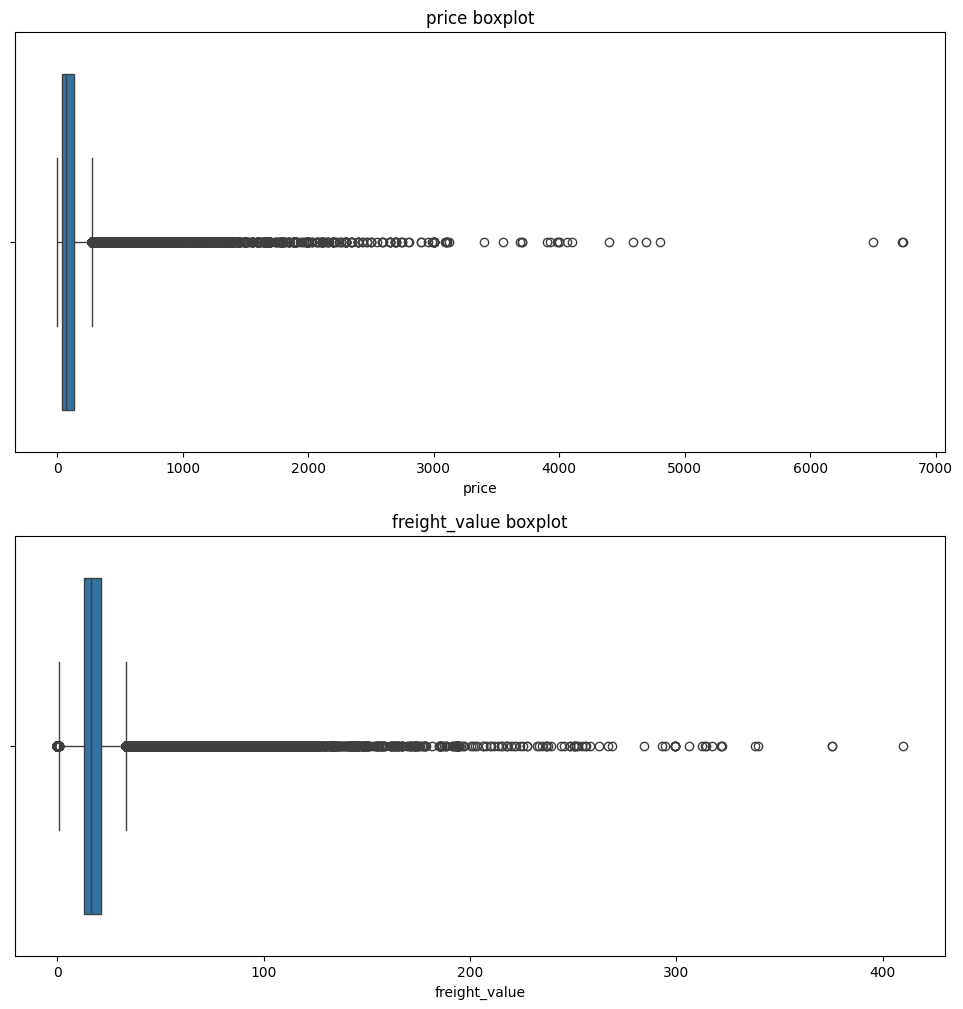

In [19]:
create_boxplot(order_items_df, ['order_item_id'])

From the result above we can see that:
- There are no missing values.
- There are no duplicated rows.
- The data type for shipping_limit_date is still object, it should be datetime.
- There are duplicates in the order_id and order_item_id, but this is not a problem because, according to the dataset documentation, this dataset is designed to represent the items purchased in an order. Therefore, duplicates in order_id and order_item_id are expected.
- There are a lot of outliers in the price and freight_value columns.

#### order_payments

In [20]:
asses_basic_info(order_payments_df, ['order_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
None

No missing values found.

Number of duplicated rows: 0

Number of duplicated order_id: 4446


In [21]:
print(order_payments_df['payment_type'].nunique())
print(order_payments_df['payment_type'].value_counts())

5
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


In [22]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [23]:
# trying to find why there are duplicated order_id
payment_duplicated_order_id = order_payments_df.duplicated(subset=['order_id'])
order_payments_df[payment_duplicated_order_id]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


In [24]:
order_payments_df[order_payments_df['order_id'] == 'e6a66a8350bb88497954d37688ab123e'].sort_values(by='payment_sequential')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39743,e6a66a8350bb88497954d37688ab123e,1,voucher,1,4.95
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
42000,e6a66a8350bb88497954d37688ab123e,3,voucher,1,5.75
826,e6a66a8350bb88497954d37688ab123e,4,voucher,1,8.24
71825,e6a66a8350bb88497954d37688ab123e,5,voucher,1,19.16
16289,e6a66a8350bb88497954d37688ab123e,6,voucher,1,17.30
45326,e6a66a8350bb88497954d37688ab123e,7,voucher,1,16.11
96318,e6a66a8350bb88497954d37688ab123e,8,voucher,1,9.83


In [25]:
# finding payment with 0 installments
order_payments_df[order_payments_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


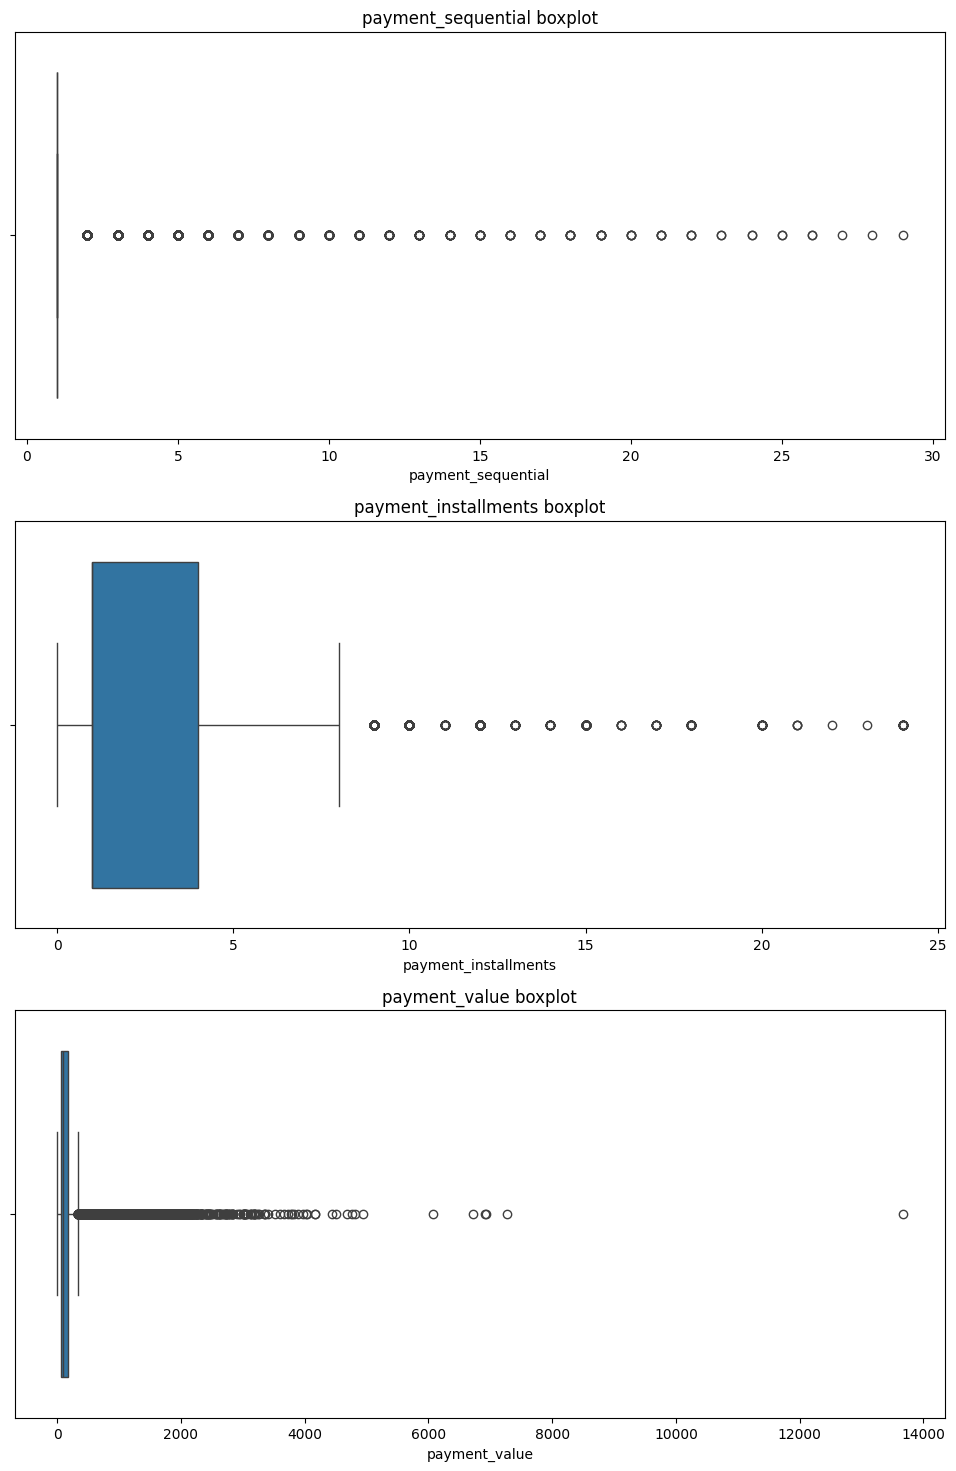

In [26]:
create_boxplot(order_payments_df)

From the result above we can see that:
- There are no missing values.
- There are no duplicated rows.
- There are duplicates for order_id this is largely caused by payment_sequential > 1, from the datasets description for payment_sequential is "a customer may pay an order with more than one payment method. If he does so, a sequence will be created to accommodate all payments.". This is why there are duplicates for order_id.
- There are 2 data with the value of 0 for the columns payment_installments, this is invalid because an installment must have a minimum value of 1.
- There are a lot of outliers in the payment_sequential, payment_installments, payment_value columns.

#### order_reviews

In [27]:
asses_basic_info(order_reviews_df, ['review_id', 'order_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None

Found missing values in 2 columns with these details:
review_comment_title      87656
review_comment_message    58247
dtype: int64

Number of duplicated rows: 0

Number of duplicated review_id: 814

Number of duplicated order_id: 551


In [28]:
order_reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [29]:
# trying to find why there are duplicated review_id
duplicate_reviews = order_reviews_df[order_reviews_df.duplicated('review_id', keep=False)]
duplicate_reviews.sort_values(by='review_id').head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
46678,00130cbe1f9d422698c812ed8ded1919,dfcdfc43867d1c1381bfaf62d6b9c195,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
29841,00130cbe1f9d422698c812ed8ded1919,04a28263e085d399c97ae49e0b477efa,1,NaN,"O cartucho ""original HP"" 60XL não é reconhecid...",2018-03-07 00:00:00,2018-03-20 18:08:23
90677,0115633a9c298b6a98bcbe4eee75345f,78a4201f58af3463bdab842eea4bc801,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
63193,0115633a9c298b6a98bcbe4eee75345f,0c9850b2c179c1ef60d2855e2751d1fa,5,NaN,NaN,2017-09-21 00:00:00,2017-09-26 03:27:47
92876,0174caf0ee5964646040cd94e15ac95e,f93a732712407c02dce5dd5088d0f47b,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
57280,0174caf0ee5964646040cd94e15ac95e,74db91e33b4e1fd865356c89a61abf1f,1,NaN,Produto entregue dentro de embalagem do fornec...,2018-03-07 00:00:00,2018-03-08 03:00:53
54832,017808d29fd1f942d97e50184dfb4c13,8daaa9e99d60fbba579cc1c3e3bfae01,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30
20621,0254bd905dc677a6078990aad3331a36,5bf226cf882c5bf4247f89a97c86f273,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44
96080,0254bd905dc677a6078990aad3331a36,331b367bdd766f3d1cf518777317b5d9,1,NaN,O pedido consta de 2 produtos e até agora rece...,2017-09-09 00:00:00,2017-09-13 09:52:44


In [30]:
order_items_df[order_items_df['order_id'] == 'dfcdfc43867d1c1381bfaf62d6b9c195']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
98681,dfcdfc43867d1c1381bfaf62d6b9c195,1,36f60d45225e60c7da4558b070ce4b60,00fc707aaaad2d31347cf883cd2dfe10,2018-02-14 18:15:36,89.15,25.9


In [31]:
order_items_df[order_items_df['order_id'] == '04a28263e085d399c97ae49e0b477efa']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
2058,04a28263e085d399c97ae49e0b477efa,1,3f14d740544f37ece8a9e7bc8349797e,6973a06f484aacf400ece213dbf3d946,2018-02-09 18:15:37,84.89,15.34


In [32]:
# trying to find why there are duplicated order_id
duplicate_reviews_order_id = order_reviews_df[order_reviews_df.duplicated('order_id', keep=False)]
duplicate_reviews_order_id.sort_values(by='order_id').head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
25612,89a02c45c340aeeb1354a24e7d4b2c1e,0035246a40f520710769010f752e7507,5,NaN,NaN,2017-08-29 00:00:00,2017-08-30 01:59:12
22423,2a74b0559eb58fc1ff842ecc999594cb,0035246a40f520710769010f752e7507,5,NaN,Estou acostumada a comprar produtos pelo barat...,2017-08-25 00:00:00,2017-08-29 21:45:57
22779,ab30810c29da5da8045216f0f62652a2,013056cfe49763c6f66bda03396c5ee3,5,NaN,NaN,2018-02-22 00:00:00,2018-02-23 12:12:30
68633,73413b847f63e02bc752b364f6d05ee9,013056cfe49763c6f66bda03396c5ee3,4,NaN,NaN,2018-03-04 00:00:00,2018-03-05 17:02:00
854,830636803620cdf8b6ffaf1b2f6e92b2,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:06
83224,d8e8c42271c8fb67b9dad95d98c8ff80,0176a6846bcb3b0d3aa3116a9a768597,5,NaN,NaN,2017-12-30 00:00:00,2018-01-02 10:54:47
17582,017f0e1ea6386de662cbeba299c59ad1,02355020fd0a40a0d56df9f6ff060413,1,NaN,ja reclamei varias vezes e ate hoje não sei on...,2018-03-29 00:00:00,2018-03-30 03:16:19
89888,0c8e7347f1cdd2aede37371543e3d163,02355020fd0a40a0d56df9f6ff060413,3,NaN,UM DOS PRODUTOS (ENTREGA02) COMPRADOS NESTE PE...,2018-03-21 00:00:00,2018-03-22 01:32:08
55137,61fe4e7d1ae801bbe169eb67b86c6eda,029863af4b968de1e5d6a82782e662f5,4,NaN,NaN,2017-07-19 00:00:00,2017-07-20 12:06:11
37911,04d945e95c788a3aa1ffbee42105637b,029863af4b968de1e5d6a82782e662f5,5,NaN,NaN,2017-07-14 00:00:00,2017-07-17 13:58:06


In [33]:
order_items_df[order_items_df['order_id'] == '0035246a40f520710769010f752e7507']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
95,0035246a40f520710769010f752e7507,1,8a6187b2665118d5095f99a25fd7ba7a,4a3ca9315b744ce9f8e9374361493884,2017-08-23 01:25:39,87.0,12.11


From the result above we can see that:
- There are a lot of missing values in the columns review_comment_title, and review_comment_message.
- There are no duplicated row.
- The data type for review_creation_date and review_answer_timestamp is not yet datetime.
- There are duplicated review_id, after seeing the data it seems that in the rows where the review_id is the same the only difference is the order_id and the rest of the columns value is duplicated. After seeing the item with the same review_id but different order_id in the order_items_df it turns out that they are two completely different product and is sold by different seller.
- There are duplicated order_id even though one order should only have one review. After seeing some data in order_items_df with the duplicated order_id most of them only have one item in it, this means that the different review with the same order_id is not for different items, thus strengthening the point that one order can only have one review. The duplicated order_id is just bad data.

#### products

In [34]:
asses_basic_info(products_df, ['product_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Found missing values in 8 columns with these details:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g 

In [35]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [36]:
products_df.describe(include='object')

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


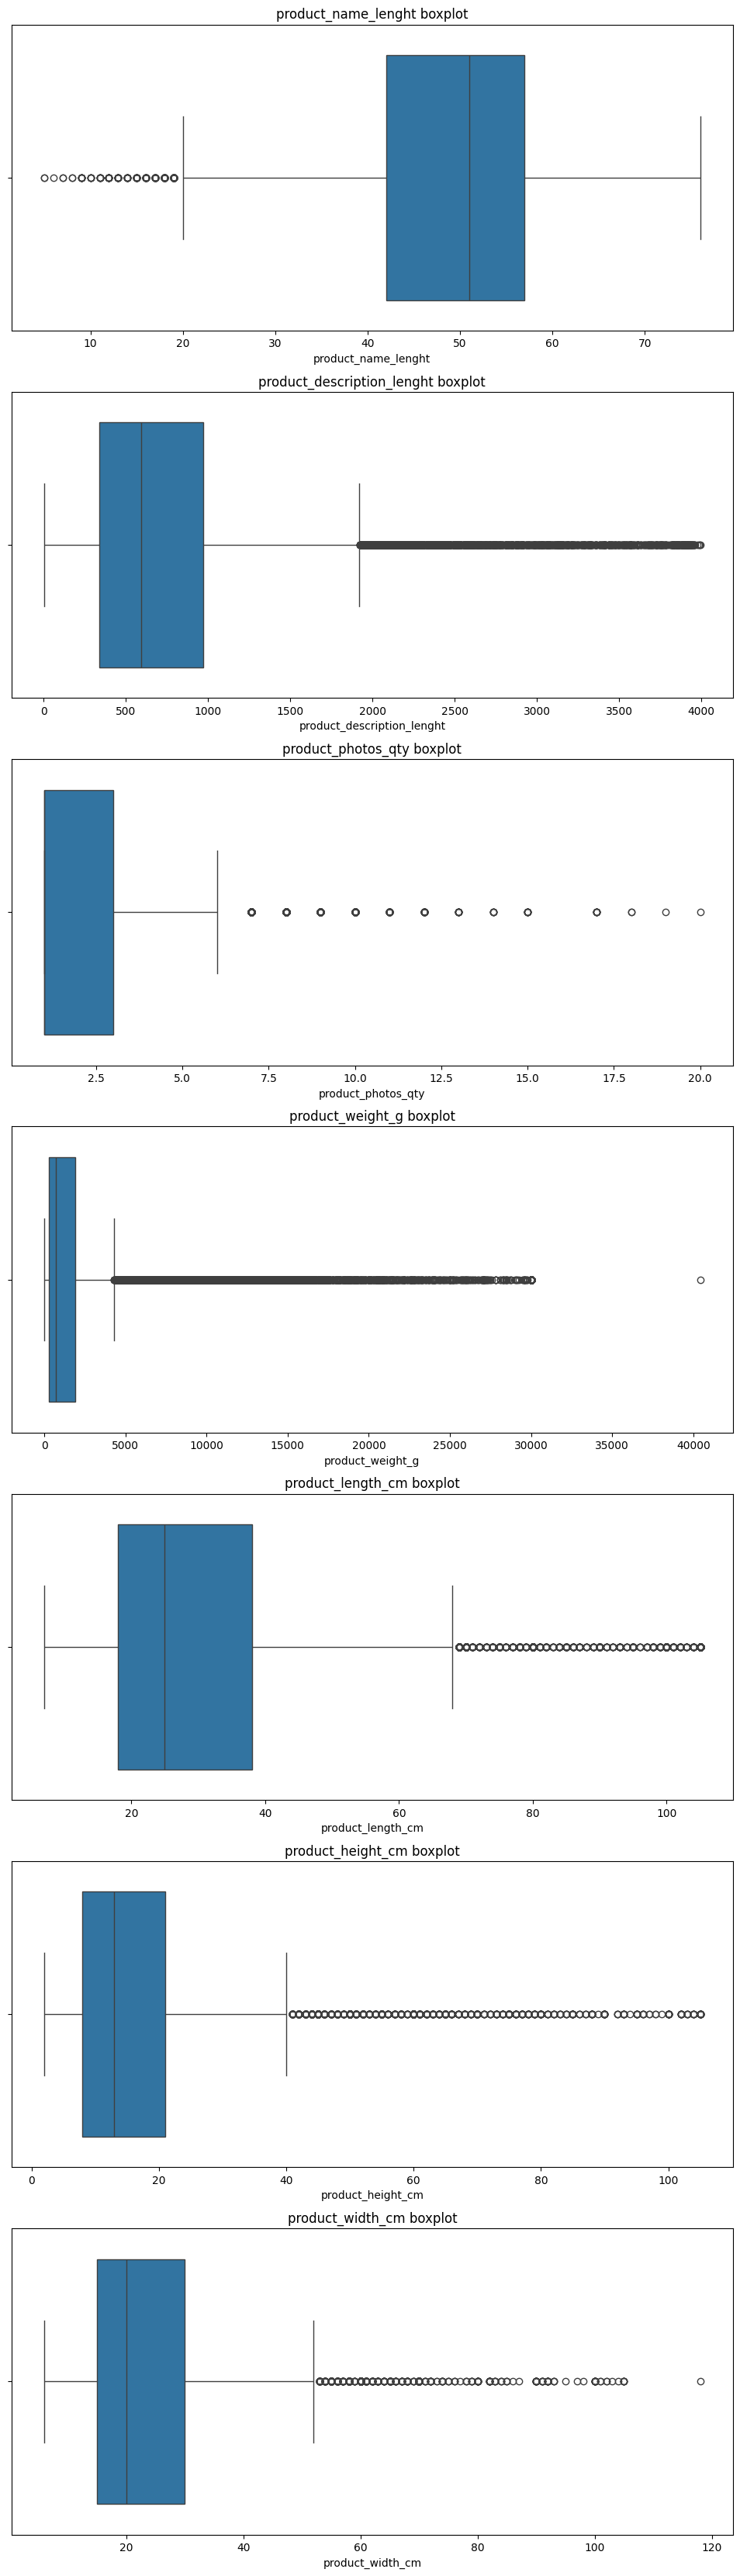

In [37]:
create_boxplot(products_df)

From the result above we can see that:
- Almost all of the columns contain missing values except for product_id
- There are typo in some of the column name -> product_name_lenght, and product_description_lenght. 'lenght' should be 'length'
- There are no duplicated rows
- There are a lot of outliers especially in the product_description_lenght and product_weight_g columns.

#### product_category_name_translation

In [38]:
asses_basic_info(product_category_name_translation_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

No missing values found.

Number of duplicated rows: 0


In [39]:
product_category_name_translation_df.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


From the result above we can see that:
- There are no missing values
- There are no duplicated rows
- This dataset is very clean because it only contain translation for product category name

#### customers

In [40]:
asses_basic_info(customers_df, ['customer_id', 'customer_unique_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

No missing values found.

Number of duplicated rows: 0

Number of duplicated customer_id: 0

Number of duplicated customer_unique_id: 3345


In [41]:
customers_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


From the result above we can see that:
- There are no missing values
- There are no duplicated rows
- The duplication in customer_unique_id is expected as the description of the dataset said that every time a customer creates an order it will create a different customer_id, the purpose of customer_unique_id is to identify customers that made repurchases at the store.

#### sellers

In [42]:
asses_basic_info(sellers_df, ['seller_id'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
None

No missing values found.

Number of duplicated rows: 0

Number of duplicated seller_id: 0


In [43]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


From the result above we can see that:
- There are no missing values
- There are no duplicated rows

#### geolocation

In [44]:
asses_basic_info(geolocation_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

No missing values found.

Number of duplicated rows: 261831


In [45]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [46]:
geolocation_df[geolocation_df.duplicated()].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP


From the result above we can see that:
- There are no missing values
- There are a lot of duplicated rows (approximately 26% from the total data)

#### **Key Insight:**
- Most of the datasets doesn't contain missing values or duplicated rows.
- All columns in which the data type should be datetime is not yet datetime but rather object.
- Most numeric columns in all of the datasets contain a lot of outliers.

### Cleaning Data

#### Cleaning Plan Overview
From the previous step we know that there are some problems with our datasets, that is:
- All columns in which the data type should be datetime is not yet datetime but rather object.
- Most numeric columns in all of the datasets contain a lot of outliers.
- Missing values.
- Duplicated rows.
- Duplicated id when it's supposed to be unique
- Invalid value

The treatment plan for these problems are as follows:
- **All columns in which the data type should be datetime is not yet datetime but rather object.**
    - Changing the data type from object to datetime.
- **Most numeric columns in all of the datasets contain a lot of outliers.**
    - Because the purpose of this project is to do analysis, we won't be dropping these outliers, but if the purpose is for training an AI model then the outliers should be handled accordingly.
- **Missing values**
    - Replacing the missing values with something else if possible, or
    - Dropping the data that contained missing value if the rows are less than 10-15% from the total rows.
- **Duplicated rows**
    - Dropping the rows
- **Duplicated id when it's supposed to be unique**
    - Dropping the rows
- **Invalid value**
    - Replacing the invalid value with something else if possible, or
    - Dropping them if it is less than 10-15% from the total rows.

**Additionally we will also sort datasets that can be sorted by a date**

#### Cleaning orders_df

From the previous step, there are 2 problems with orders_df, that is:
- There are some missing values in these 3 columns: order_approved_at, order_delivered_carrier_date, order_delivered_customer_date
- The data type for columns about date (ex: order_purchase_timestamp) is not in a datetime data type yet

In [47]:
#saving current state for comparison/later use
uncleaned_orders_df = orders_df.copy()

In [48]:
# changing data type to datetime for order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
orders_datetime_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for col in orders_datetime_cols:
    orders_df[col] = pd.to_datetime(orders_df[col])

orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [49]:
print(orders_df['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [50]:
# creating variables to see additional info
earliest_date = min(orders_df.describe().iloc[2])
latest_date = max(orders_df.describe().iloc[-1])
range_date = latest_date - earliest_date
print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")
print(f"Range of dataset date: {range_date}")

Earliest date: 2016-09-04 21:15:19
Latest date: 2018-11-12 00:00:00
Range of dataset date: 798 days 02:44:41


In [51]:
purchased_to_approved = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
approved_to_delivered_carrier = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at'] 
approved_to_delivered_customer = orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']
delivered_carrier_to_delivered_customer = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date'] 

In [52]:
print("Statistics of time taken for an order to be approved after purchase:")
print(purchased_to_approved.describe())

print("\nStatistics of time taken for an order to be delivered from seller to carrier after approved:")
print(approved_to_delivered_carrier.describe())

Statistics of time taken for an order to be approved after purchase:
count                        99281
mean     0 days 10:25:08.739486910
std      1 days 02:02:16.813098347
min                0 days 00:00:00
25%                0 days 00:12:54
50%                0 days 00:20:36
75%                0 days 14:34:51
max              187 days 21:10:50
dtype: object

Statistics of time taken for an order to be delivered from seller to carrier after approved:
count                        97644
mean     2 days 19:19:15.298850927
std      3 days 13:11:10.497083683
min            -172 days +18:44:38
25%                0 days 21:00:44
50%         1 days 19:38:29.500000
75%         3 days 13:55:52.500000
max              125 days 18:18:06
dtype: object


In [53]:
print("Statistics of time taken for an order to be delivered to customer after approved:")
print(approved_to_delivered_customer.describe())

print("\nStatistics of time taken for an order to be delivered to customer from carrier:")
print(delivered_carrier_to_delivered_customer.describe())

Statistics of time taken for an order to be delivered to customer after approved:
count                         96462
mean     12 days 03:07:42.855694470
std       9 days 12:24:16.979327481
min               -7 days +00:14:54
25%          6 days 07:26:16.250000
50%          9 days 20:27:15.500000
75%         15 days 03:23:26.750000
max               208 days 12:01:24
dtype: object

Statistics of time taken for an order to be delivered to customer from carrier:
count                        96475
mean     9 days 07:55:59.254148743
std      8 days 18:14:34.522067763
min             -17 days +21:41:31
25%         4 days 02:23:55.500000
50%                7 days 02:23:40
75%        12 days 00:41:55.500000
max              205 days 04:35:00
dtype: object


There is an anomaly in the time taken for an order to be delivered (both to carrier and to customer) after approved, it has a minimum value of -172 days for the carrier and -7 days for the customer, this means that an order is already delivered (either to carrier or customer) before it is approved which doesn't make sense.

There is also an anomaly in the time taken for an order to be delivered to customer from carrier, it has a minimum value of -17 days, this means that an order is delivered to a customer before it's delivered to the carrier by the seller.

In [54]:
# see the data in which the delivered date (carrier) is before its approved date
print(orders_df[orders_df['order_delivered_carrier_date'] <= orders_df['order_approved_at']].shape)
print(orders_df[orders_df['order_delivered_carrier_date'] <= orders_df['order_approved_at']]['order_status'].value_counts())
orders_df[orders_df['order_delivered_carrier_date'] <= orders_df['order_approved_at']].head()

(1359, 8)
order_status
delivered    1350
shipped         9
Name: count, dtype: int64


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04
64,688052146432ef8253587b930b01a06d,81e08b08e5ed4472008030d70327c71f,delivered,2018-04-22 08:48:13,2018-04-24 18:25:22,2018-04-23 19:19:14,2018-04-24 19:31:58,2018-05-15
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31
210,412fccb2b44a99b36714bca3fef8ad7b,c6865c523687cb3f235aa599afef1710,delivered,2018-07-22 22:30:05,2018-07-23 12:31:53,2018-07-23 12:24:00,2018-07-24 19:26:42,2018-07-31
415,56a4ac10a4a8f2ba7693523bb439eede,78438ba6ace7d2cb023dbbc81b083562,delivered,2018-07-22 13:04:47,2018-07-27 23:31:09,2018-07-24 14:03:00,2018-07-28 00:05:39,2018-08-06


In [55]:
# see the data in which the delivered date (customer) is before its approved date
print(orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_approved_at']].shape)
print(orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_approved_at']]['order_status'].value_counts())
orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_approved_at']].head()

(61, 8)
order_status
delivered    61
Name: count, dtype: int64


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31
483,4df92d82d79c3b52c7138679fa9b07fc,ba0660bf3fffe505ee892e153a2fbd49,delivered,2018-07-24 11:32:11,2018-07-29 23:30:52,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06
1986,6e57e23ecac1ae881286657694444267,2dda54e25d0984e12705c84d4030e6e0,delivered,2018-08-09 17:36:47,2018-08-20 15:55:42,2018-08-14 13:26:00,2018-08-17 16:45:45,2018-09-06
3659,f222c56f035b47dfa1e069a88235d730,b74ca180d63f9ae0443e4e13a2f5bdaf,delivered,2018-01-30 09:43:45,2018-02-04 23:31:47,2018-01-31 19:48:44,2018-02-01 20:10:38,2018-02-15
11738,cf72398d0690f841271b695bbfda82d2,2b7fff075bda701552485ef3f0810257,delivered,2017-09-01 18:45:33,2017-09-13 22:04:39,2017-09-04 20:12:41,2017-09-11 14:15:02,2017-09-21


In [56]:
# see the data in which the order is delivered to customer before it is delivered to carrier
print(orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_delivered_carrier_date']].shape)
print(orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_delivered_carrier_date']]['order_status'].value_counts())
orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_delivered_carrier_date']].head()

(32, 8)
order_status
delivered    32
Name: count, dtype: int64


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3706,3324048ac2f2df01f583f71758589776,358be33e0da76b214b9504d0ca78c556,delivered,2017-07-23 21:24:59,2017-07-25 03:30:18,2017-08-09 18:18:28,2017-08-09 18:18:28,2017-08-15
4825,6d1f5da238306b0008063ff2f93feac9,d0c2b163c8b4b73d70c5dfe22e79839f,delivered,2018-03-24 19:51:16,2018-03-24 20:08:24,2018-03-27 00:08:32,2018-03-27 00:08:32,2018-04-13
6437,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14
9553,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21
13487,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08


Because the number of rows in which the anomaly occured is small (<2%), we will simply drop these rows.

In [57]:
orders_df.drop(
    orders_df[orders_df['order_delivered_carrier_date'] <= orders_df['order_approved_at']].index,
    inplace=True
)

orders_df.drop(
    orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_approved_at']].index,
    inplace=True
)

orders_df.drop(
    orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_delivered_carrier_date']].index,
    inplace=True
)

# making sure the anomaly is successfully dropped
print(orders_df[orders_df['order_delivered_carrier_date'] <= orders_df['order_approved_at']].shape)
print(orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_approved_at']].shape)
print(orders_df[orders_df['order_delivered_customer_date'] <= orders_df['order_delivered_carrier_date']].shape)

(0, 8)
(0, 8)
(0, 8)


In [58]:
orders_df.reset_index(drop=True, inplace=True)

In [59]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
98045,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
98046,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
98047,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
98048,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


Treating missing values

In [60]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2956
order_estimated_delivery_date       0
dtype: int64

In [61]:
# comparing order_status of the whole dataset with the data with missing values
print("Order status of the whole dataset: ")
print(orders_df['order_status'].value_counts())

# seeing order_status of data with missing values
orders_df_with_na = orders_df[orders_df.isna().any(axis=1)]
print("\nOrder status of data with missing values: ")
print(orders_df_with_na['order_status'].value_counts())

Order status of the whole dataset: 
order_status
delivered      95096
shipped         1098
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Order status of data with missing values: 
order_status
shipped        1098
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
Name: count, dtype: int64


In [62]:
# seeing order_status of data with missing values in order_approved_at
print("\norder_approved_at")
print(orders_df_with_na[orders_df_with_na['order_approved_at'].isna()]['order_status'].value_counts())

# seeing order_status of data with missing values in order_delivered_carrier_date
print("\norder_delivered_carrier_date")
print(orders_df_with_na[orders_df_with_na['order_delivered_carrier_date'].isna()]['order_status'].value_counts())

# seeing order_status of data with missing values in order_delivered_customer_date
print("\norder_delivered_customer_date")
print(orders_df_with_na[orders_df_with_na['order_delivered_customer_date'].isna()]['order_status'].value_counts())



order_approved_at
order_status
canceled     141
delivered     14
created        5
Name: count, dtype: int64

order_delivered_carrier_date
order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

order_delivered_customer_date
order_status
shipped        1098
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64


In [63]:
# checking the order_status of data with missing values in order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date
orders_df_with_na[orders_df_with_na['order_approved_at'].isna() & orders_df_with_na['order_delivered_carrier_date'].isna() & orders_df_with_na['order_delivered_customer_date'].isna()]['order_status'].value_counts()

order_status
canceled    141
created       5
Name: count, dtype: int64

As we can see from the results above, canceled order is one of the top status in the data with missing values, this make senses because a canceled order most likely won't have a date relating to its approval (order_approved_at), or when they are delivered (order_delivered_carrier_date or order_delivered_customer_date) or a combination of them.

**Because the purpose of this project is analytical, we won't drop the data with missing values that have the order_status of canceled.**

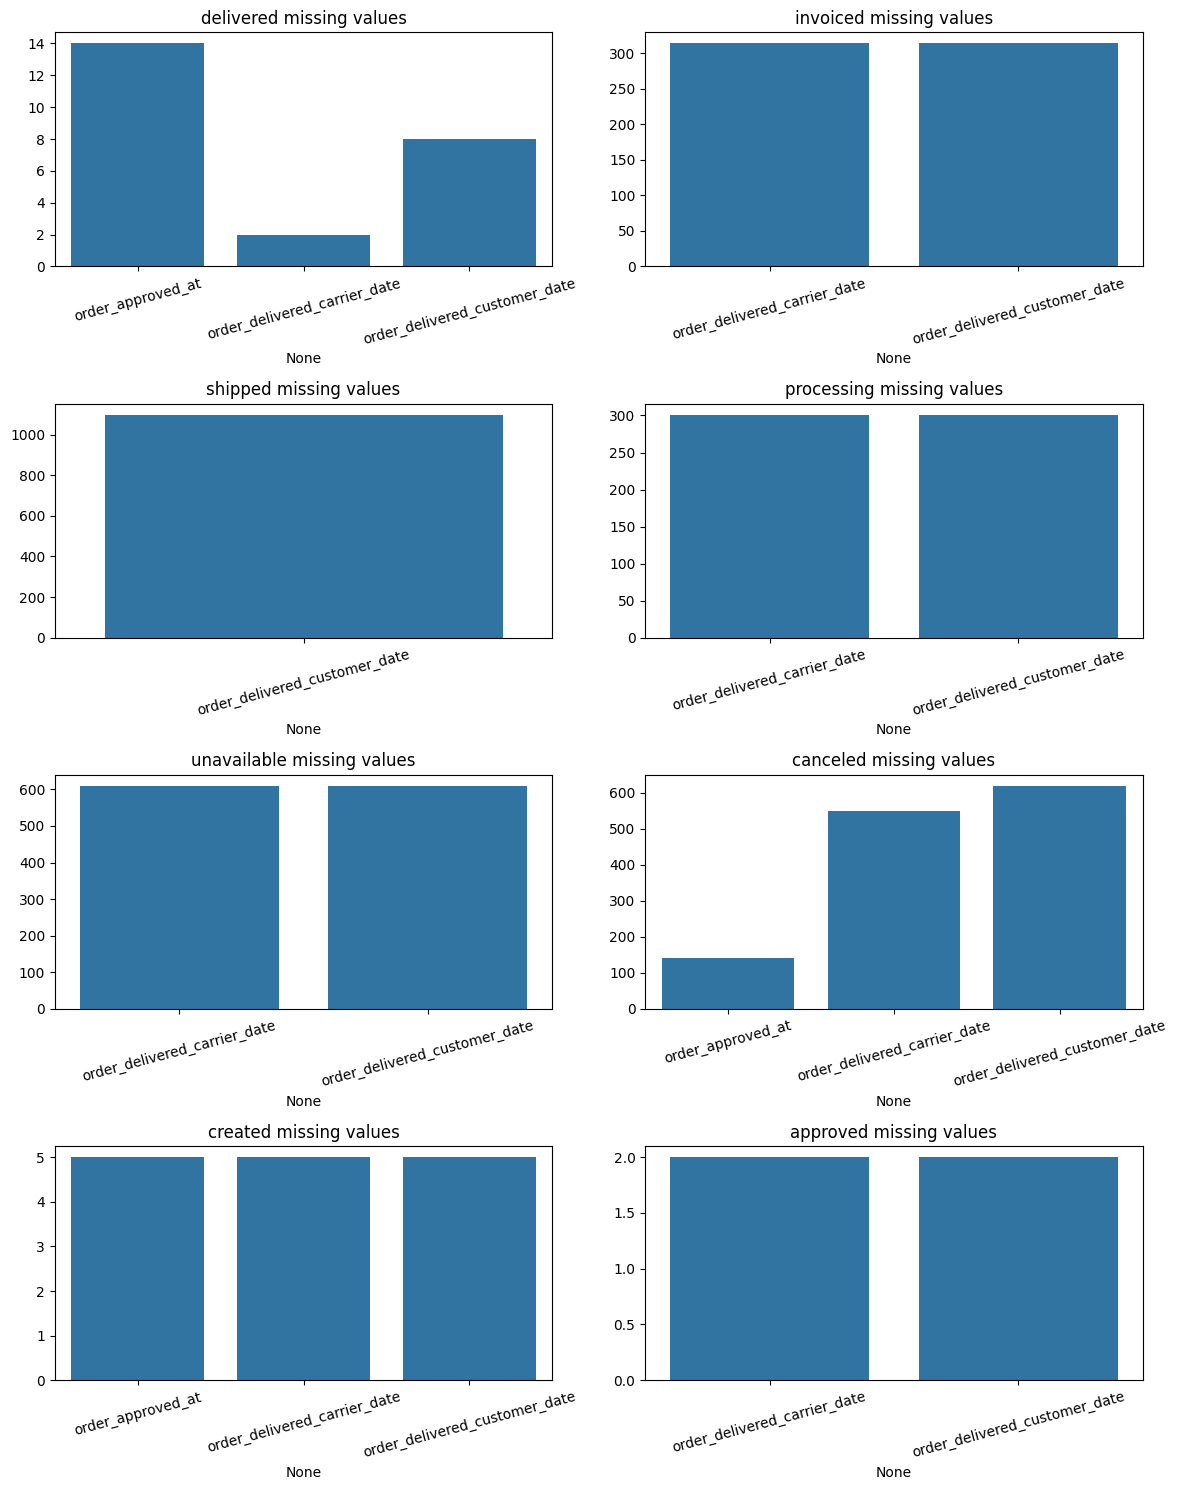

In [64]:
# analyzing missing values in the dataset by order_status
fig, axes = plt.subplots(4, 2, figsize=(12, 15))
axes = axes.ravel()  # Flatten into a 1D array


for index, status in enumerate(orders_df['order_status'].unique()):
    temp_df = orders_df[orders_df['order_status'] == status].isna().sum()

    # Discard columns with 0 missing values
    temp_df = temp_df[temp_df > 0]
    if temp_df.empty:
        continue  # Skip if there are no missing values

    sns.barplot(x=temp_df.index, y=temp_df.values, ax=axes[index])
    axes[index].set_title(f"{status} missing values")
    axes[index].set_xticks(range(len(temp_df.index)))
    axes[index].set_xticklabels(temp_df.index, rotation=15)


plt.tight_layout()
plt.show()

From the graphs above we can see that all of order_status has a missing values, we will be treating them as follows:
- Delivered
    - Replacing the missing values with median (e.g. order_approved_at -> median of time taken for an order to be approved after purchase)
- Invoiced
    - If the order_approved_at date + 1 month is less than or equal to the latest date then we will replace the missing values with the median of how much time it takes for an order to be delivered, otherwise we will leave it be
- Shipped
    - Replacing the missing values with median of time difference between delivered status of carrier and customer
- Processing
    - If the order_approved_at date + 1 month is less than or equal to the latest date then we will replace the missing values with the median of how much time it takes for an order to be delivered, otherwise we will leave it be
- Unavailable
    - We will leave it be because unavailable means the order could not be fulfilled due to product unavailability and so it will never be delivered.
- Canceled
    - As stated before we won't be dropping/changing the data
- Created
    - If the order_purchase_timestamp date + 1 month is less than or equal to the latest date then we will replace the missing values with the median of their respective columns (e.g. order_approved_at -> median of how much time it takes for an order to be approved from purchase), otherwise we will leave it be
- Approved
    - If the order_approved_at date + 1 month is less than or equal to the latest date then we will replace the missing values with the median of how much time it takes for an order to be delivered, otherwise we will leave it be

**\*We won't be changing the order status after their respective missing value(s) is replaced (e.g. from shipped to delivered) for analytical purpose.**

In [65]:
# setting up median of various time differences
median_purchase_to_approved = purchased_to_approved.median()
median_approved_to_delivered_carrier = approved_to_delivered_carrier.median()
median_approved_to_delivered_customer = approved_to_delivered_customer.median()
median_delivered_carrier_to_delivered_customer = delivered_carrier_to_delivered_customer.median()

Cleaning missing values in order_status = delivered

In [66]:
# Fill missing values only for delivered orders
mask_delivered = orders_df['order_status'] == 'delivered'

orders_df.loc[mask_delivered, 'order_approved_at'] = orders_df.loc[mask_delivered, 'order_approved_at'].fillna(
    orders_df.loc[mask_delivered, 'order_purchase_timestamp'] + median_purchase_to_approved
)

orders_df.loc[mask_delivered, 'order_delivered_carrier_date'] = orders_df.loc[mask_delivered, 'order_delivered_carrier_date'].fillna(
    orders_df.loc[mask_delivered, 'order_approved_at'] + median_approved_to_delivered_carrier
)

orders_df.loc[mask_delivered, 'order_delivered_customer_date'] = orders_df.loc[mask_delivered, 'order_delivered_customer_date'].fillna(
    orders_df.loc[mask_delivered, 'order_delivered_carrier_date'] + median_delivered_carrier_to_delivered_customer
)

print(orders_df[orders_df['order_status'] == 'delivered'].isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Cleaning missing values in order_status = invoiced

In [67]:
# Define the condition: order_approved_at + 1 month <= latest_date
mask_invoiced = (orders_df['order_status'] == 'invoiced') & (orders_df['order_approved_at'] + pd.DateOffset(months=1) <= latest_date)

# Fill missing values when the condition is true
orders_df.loc[mask_invoiced, 'order_delivered_carrier_date'] = orders_df.loc[mask_invoiced, 'order_delivered_carrier_date'].fillna(
    orders_df.loc[mask_invoiced, 'order_approved_at'] + median_approved_to_delivered_carrier
)
orders_df.loc[mask_invoiced, 'order_delivered_customer_date'] = orders_df.loc[mask_invoiced, 'order_delivered_customer_date'].fillna(
    orders_df.loc[mask_invoiced, 'order_delivered_carrier_date'] + median_delivered_carrier_to_delivered_customer
)

print(orders_df[orders_df['order_status'] == 'invoiced'].isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Cleaning missing values in order_status = shipped

In [68]:
mask_shipped = orders_df['order_status'] == 'shipped'
orders_df.loc[mask_shipped, 'order_delivered_customer_date'] = orders_df.loc[mask_shipped, 'order_delivered_customer_date'].fillna(
    orders_df.loc[mask_shipped, 'order_delivered_carrier_date'] + median_delivered_carrier_to_delivered_customer
)

print(orders_df[orders_df['order_status'] == 'invoiced'].isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Cleaning missing values in order_status = processing

In [69]:
# Define the condition: order_approved_at + 1 month <= latest_date
mask_processing = (orders_df['order_status'] == 'processing') & (orders_df['order_approved_at'] + pd.DateOffset(months=1) <= latest_date)

# Fill missing values when the condition is true
orders_df.loc[mask_processing, 'order_delivered_carrier_date'] = orders_df.loc[mask_processing, 'order_delivered_carrier_date'].fillna(
    orders_df.loc[mask_processing, 'order_approved_at'] + median_approved_to_delivered_carrier
)
orders_df.loc[mask_processing, 'order_delivered_customer_date'] = orders_df.loc[mask_processing, 'order_delivered_customer_date'].fillna(
    orders_df.loc[mask_processing, 'order_delivered_carrier_date'] + median_delivered_carrier_to_delivered_customer
)

print(orders_df[orders_df['order_status'] == 'processing'].isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Cleaning missing values in order_status = created

In [70]:
# Define the condition: order_approved_at + 1 month <= latest_date
mask_created_purchase_timestamp = (orders_df['order_status'] == 'created') & (orders_df['order_purchase_timestamp'] + pd.DateOffset(months=1) <= latest_date)

# Fill missing values when the condition is true
orders_df.loc[mask_created_purchase_timestamp, 'order_approved_at'] = orders_df.loc[mask_created_purchase_timestamp, 'order_approved_at'].fillna(
    orders_df.loc[mask_created_purchase_timestamp, 'order_purchase_timestamp'] + median_approved_to_delivered_carrier
)

mask_created_approved_at = (orders_df['order_status'] == 'created') & (orders_df['order_approved_at'] + pd.DateOffset(months=1) <= latest_date)

orders_df.loc[mask_created_approved_at, 'order_delivered_carrier_date'] = orders_df.loc[mask_created_approved_at, 'order_delivered_carrier_date'].fillna(
    orders_df.loc[mask_created_approved_at, 'order_approved_at'] + median_approved_to_delivered_carrier
)
orders_df.loc[mask_created_approved_at, 'order_delivered_customer_date'] = orders_df.loc[mask_created_approved_at, 'order_delivered_customer_date'].fillna(
    orders_df.loc[mask_created_approved_at, 'order_delivered_carrier_date'] + median_delivered_carrier_to_delivered_customer
)

print(orders_df[orders_df['order_status'] == 'created'].isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


Cleaning missing values in order_status = approved

In [71]:
# Define the condition: order_approved_at + 1 month <= latest_date
mask_approved = (orders_df['order_status'] == 'approved') & (orders_df['order_approved_at'] + pd.DateOffset(months=1) <= latest_date)

# Fill missing values when the condition is true
orders_df.loc[mask_approved, 'order_delivered_carrier_date'] = orders_df.loc[mask_approved, 'order_delivered_carrier_date'].fillna(
    orders_df.loc[mask_approved, 'order_approved_at'] + median_approved_to_delivered_carrier
)
orders_df.loc[mask_approved, 'order_delivered_customer_date'] = orders_df.loc[mask_approved, 'order_delivered_customer_date'].fillna(
    orders_df.loc[mask_approved, 'order_delivered_carrier_date'] + median_delivered_carrier_to_delivered_customer
)

print(orders_df[orders_df['order_status'] == 'approved'].isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [72]:
# sorting orders_df by their purchase timestamp
orders_df = orders_df.sort_values(by="order_purchase_timestamp")
orders_df.reset_index(drop=True, inplace=True)
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-25 15:38:31,2016-10-20
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25


##### End result of cleaning orders_df

In [73]:
print("Uncleaned orders_df info")
print(uncleaned_orders_df.info())

print("\nCleaned orders_df info")
print(orders_df.info())

Uncleaned orders_df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Cleaned orders_df info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98050 entries, 0 to 98049
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                      

In [74]:
print("Uncleaned orders_df missing values")
print(uncleaned_orders_df.isna().sum())

print("\nCleaned orders_df missing values")
print(orders_df.isna().sum())

Uncleaned orders_df missing values
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Cleaned orders_df missing values
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 141
order_delivered_carrier_date     1159
order_delivered_customer_date    1228
order_estimated_delivery_date       0
dtype: int64


#### Cleaning order_items_df

As already identified in the assessing data step, this dataset contain only one problem, that is:
- The data type for shipping_limit_date is still object, it should be datetime.

In [75]:
print("Before converting:")
print(order_items_df.info())

# convert the shipping_limit_date to datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

print("\nAfter converting:")
print(order_items_df.info())

Before converting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

After converting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null 

In [76]:
# sorting order_items_df by shipping_limit_date
order_items_df = order_items_df.sort_values(by="shipping_limit_date")
order_items_df.reset_index(drop=True, inplace=True)
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56
1,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
2,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
3,bfbd0f9bdef84302105ad712db648a6c,3,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83
4,cd3b8574c82b42fc8129f6d502690c3e,1,e2a1d45a73dc7f5a7f9236b043431b89,b499c00f28f4b7069ff6550af8c1348a,2016-10-08 10:34:01,29.99,10.96


#### Cleaning order_payments_df

As already identified in the assessing data step, this dataset contain only one problem, that is:
- There are 2 data with the value of 0 for the columns payment_installments, this is invalid because an installment must have a minimum value of 1.

**To treat this we will simply just drop the rows because it's very small and we will also be deleting those order in orders_df, order_items_df, and order_reviews_df to maintain consistency**

In [77]:
# seeing the data with 0 payment installments
order_payments_df[order_payments_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
46982,744bade1fcf9ff3f31d860ace076d422,2,credit_card,0,58.69
79014,1a57108394169c0b47d8f876acc9ba2d,2,credit_card,0,129.94


In [78]:
order_0_installments_ids = order_payments_df[order_payments_df['payment_installments'] == 0]['order_id']

order_payments_df = order_payments_df[order_payments_df['payment_installments'] != 0]

# also dropping orders with 0 payment installments from orders_df, order_items_df, and order_reviews_df to maintain consistency
orders_df = orders_df[orders_df['order_id'].isin(order_0_installments_ids) == False].copy()
order_items_df = order_items_df[order_items_df['order_id'].isin(order_0_installments_ids) == False].copy()
order_reviews_df = order_reviews_df[order_reviews_df['order_id'].isin(order_0_installments_ids) == False].copy()

order_payments_df.reset_index(drop=True, inplace=True)
orders_df.reset_index(drop=True, inplace=True)
order_items_df.reset_index(drop=True, inplace=True)
order_reviews_df.reset_index(drop=True, inplace=True)


# making sure the data with 0 payment installments is successfully dropped
order_payments_df[order_payments_df['payment_installments'] == 0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value


#### Cleaning order_reviews_df

As identified in assesing data step, this dataset has the following problems:
- There are a lot of missing values in the columns review_comment_title, and review_comment_message.
- The data type for review_creation_date and review_answer_timestamp is not yet datetime.
- There are duplicated review_id, in the duplicated rows the only difference is the order_id
- There are duplicated order_id even though one order should only have one review.

The treatment plan for this dataset is:
- For missing values in the columns review_comment_title and review_comment_message, we will leave them be
- For columns that should have the data type datetime we will convert them
- For duplicated review_id and order_id we will drop them

**\*I have considered replacing the missing values in review_comment_title and review_comment_message with something like "no title" or "no comment" but there is a possibilty that a customer actually give a title/comment like that, so leaving it be with NaN is more wise in my opinion.**

In [79]:
print("Before converting:")
print(order_reviews_df.info())

Before converting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99222 entries, 0 to 99221
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99222 non-null  object
 1   order_id                 99222 non-null  object
 2   review_score             99222 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99222 non-null  object
 6   review_answer_timestamp  99222 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [80]:
# converting to datetime
order_reviews_datetime_cols = ['review_creation_date', 'review_answer_timestamp']
for col in order_reviews_datetime_cols:
    order_reviews_df.loc[:, col] = pd.to_datetime(order_reviews_df[col])

print("After converting:")
print(order_reviews_df.info())

After converting:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99222 entries, 0 to 99221
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99222 non-null  object
 1   order_id                 99222 non-null  object
 2   review_score             99222 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99222 non-null  object
 6   review_answer_timestamp  99222 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
None


In [81]:
# drop duplicated review_id
order_reviews_df.drop_duplicates(subset='review_id', inplace=True)

# drop duplicated order_id
order_reviews_df.drop_duplicates(subset='order_id', inplace=True)

order_reviews_df.reset_index(drop=True, inplace=True)

# making sure there are no duplicated review_id and order_id
print(f"review_id: {order_reviews_df.duplicated(subset='review_id').sum()}")
print(f"order_id: {order_reviews_df.duplicated(subset='order_id').sum()}")

review_id: 0
order_id: 0


In [82]:
# sorting order_reviews_df by review_creation_date
order_reviews_df = order_reviews_df.sort_values(by="review_creation_date")
order_reviews_df.reset_index(drop=True, inplace=True)
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,69ac6a27fde9855ebeaaecac0f78058b,809a282bbd5dbcabb6f2f724fca862ec,1,NaN,MEU PEDIDO NÃO FOI ENTREGUE E NÃO FOI DADA NEN...,2016-10-02 00:00:00,2016-10-26 12:31:00
1,6916ca4502d6d3bfd39818759d55d536,bfbd0f9bdef84302105ad712db648a6c,1,NaN,nao recebi o produto e nem resposta da empresa,2016-10-06 00:00:00,2016-10-07 18:32:28
2,49f695dffa457eaba90d388a5c37e942,e5215415bb6f76fe3b7cb68103a0d1c0,1,NaN,"PRODUTO NÃO CHEGOU,E JÁ PASSOU O PRAZO DE ENTREGA",2016-10-09 00:00:00,2016-10-11 14:31:29
3,743d98b1a4782f0646898fc915ef002a,e2144124f98f3bf46939bc5183104041,4,NaN,NaN,2016-10-15 00:00:00,2016-10-16 03:20:17
4,b2d5d8db2a841d27a72e4c06c6212368,9aa3197e4887919fde0307fc23601d7a,4,NaN,Só chegou uma parte do pedido ate agora..,2016-10-15 00:00:00,2016-10-17 21:02:49


#### Cleaning products_df

As identified in assesing data step, this dataset problems are as follows:
- Almost all of the columns contain missing values except for product_id
- There are typo in some of the column name -> product_name_lenght, and product_description_lenght. 'lenght' should be 'length'

Also we will be translating the product category name using product_category_name_translation_df.

In [83]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [84]:
# translating product category name
products_df = products_df.replace({'product_category_name': product_category_name_translation_df.set_index('product_category_name')['product_category_name_english']})
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [85]:
# fixing typo for product_name_lenght, and product_description_lenght.
products_df.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace=True)

In [86]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [87]:
products_df[products_df.isna().any(axis=1)]

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Because there is quite a lot of product with missing values, dropping them could have unwanted consequences, for example it may be the case that a product in the above table/dataframe is the most selling product, so dropping them would be a fatal mistake. There is also no way we could fill this missing value as there is not enough information.

**So in conclusion we will leave them be.**

#### Cleaning customers_df

**As identified from assessing data step, this dataset is already clean.**

#### Cleaning sellers_df

**As identified from assessing data step, this dataset is already clean.**

#### Cleaning geolocation_df

As identified from assessing data step, this dataset only has one problem that is:
- There are a lot of duplicated rows (approximately 26% from the total data)

The treatment for this is we will simply drop them.

In [88]:
print(geolocation_df.info())
print(f"\nNumber of duplicated rows: {geolocation_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
None

Number of duplicated rows: 261831


In [89]:
# dropping duplicated rows
geolocation_df.drop_duplicates(inplace=True)
geolocation_df.reset_index(drop=True, inplace=True)

# making sure the duplicated rows are dropped
print(geolocation_df.info())
print(f"\nNumber of duplicated rows: {geolocation_df.duplicated().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738332 entries, 0 to 738331
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 28.2+ MB
None

Number of duplicated rows: 0


#### **Key Insight:**
- orders_df require the most cleaning steps compared to other datasets. It involves analyzing missing values based on order_status and handling them accordingly. We also found an anomaly in which the delivered date is before the approved date.
- Converting data type to datetime is the most common cleaning step.
- For most of the missing values we didn't drop them because the purpose of this project is to do analysis, dropping them could have unintended consequences.
- Duplicated rows or rows with id that should've been unique is simply dropped.

## Exploratory Data Analysis (EDA)

### Exploring orders_df

In [90]:
print(orders_df.shape)
orders_df.sample(5)

(98049, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
34321,d17fc99c6e3eefd9ab2694dadbd05943,e1882244530a2b9f1895601ab63ecc6d,delivered,2017-11-14 21:09:04,2017-11-14 21:27:34,2017-11-20 18:54:58,2017-11-24 17:24:06,2017-12-07
7116,d8fdce7c3ba072263bdf443e1d906778,0d597964dad5f9770e7922ae7a64a21f,delivered,2017-04-21 18:56:39,2017-04-21 19:10:13,2017-04-24 08:46:28,2017-05-05 15:53:32,2017-05-24
20249,1fa0b1affd773f88e6b1feeb6d211dc5,ba9928beabf99b1e9b2a2430c83be5c7,delivered,2017-08-10 17:16:02,2017-08-10 17:30:14,2017-08-23 18:58:10,2017-09-01 18:23:28,2017-09-08
37811,ea72009e972388b2881aee7fd39a094a,714a50db626b8618bc77230f0795ec9a,delivered,2017-11-25 20:37:00,2017-11-25 20:51:43,2017-12-04 20:09:28,2017-12-19 17:51:36,2017-12-20
75018,98991dc034323e310fdd97b8af6064b0,85db3d57353cb12f8ccf1140ea473082,delivered,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-09 10:13:00,2018-05-14 17:58:16,2018-05-22


In [91]:
# seeing value counts of order_status
orders_df['order_status'].value_counts()

order_status
delivered      95095
shipped         1098
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [92]:
# creating variables to see additional info
earliest_date = min(orders_df.describe().iloc[2])
latest_date = max(orders_df.describe().iloc[-1])
range_date = latest_date - earliest_date

# creating columns to see the time differences between each stage of an order
orders_df['purchased_to_approved'] = orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']
orders_df['approved_to_delivered_carrier'] = orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at'] 
orders_df['approved_to_delivered_customer'] = orders_df['order_delivered_customer_date'] - orders_df['order_approved_at']
orders_df['delivered_carrier_to_delivered_customer'] = orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date'] 

In [93]:
print(f"Earliest date from orders: {earliest_date}")
print(f"Latest date from orders: {latest_date}")
print(f"Range of date from orders: {range_date}")

Earliest date from orders: 2016-09-04 21:15:19
Latest date from orders: 2018-11-12 00:00:00
Range of date from orders: 798 days 02:44:41


In [94]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_to_approved,approved_to_delivered_carrier,approved_to_delivered_customer,delivered_carrier_to_delivered_customer
30128,1061bc32577c6b8beb107bf1b5a65175,33d1704b767156cfd686807522b86dab,delivered,2017-10-18 12:20:20,2017-10-18 12:28:27,2017-10-21 16:46:53,2017-10-27 19:05:24,2017-11-08,0 days 00:08:07,3 days 04:18:26,9 days 06:36:57,6 days 02:18:31
7624,8ca0531483ac1ada96d124f6d42c5080,b71f77353b8fbd3465a46d282ad28c29,delivered,2017-04-26 19:37:53,2017-04-26 19:45:18,2017-04-27 13:47:35,2017-05-08 10:57:54,2017-05-26,0 days 00:07:25,0 days 18:02:17,11 days 15:12:36,10 days 21:10:19
80233,c531cb50fa0506125473379b2d74356b,95e27d868269c41e9785c6028f1cc504,delivered,2018-06-03 14:21:44,2018-06-03 14:35:23,2018-06-04 12:29:00,2018-06-09 16:59:33,2018-07-16,0 days 00:13:39,0 days 21:53:37,6 days 02:24:10,5 days 04:30:33
95748,08db644c231a8d55a618af8c9f1280f0,f97d225a3b4ab3cfebf9457ec69cf76a,delivered,2018-08-15 16:55:14,2018-08-15 17:10:23,2018-08-16 14:44:00,2018-08-22 18:52:03,2018-08-28,0 days 00:15:09,0 days 21:33:37,7 days 01:41:40,6 days 04:08:03
85790,545795e47c9e134237b256ef5b98857b,43940279ae4eb68e5e8047f5af626329,delivered,2018-06-30 10:18:49,2018-07-05 16:15:56,2018-07-18 13:29:00,2018-07-30 13:55:57,2018-08-02,5 days 05:57:07,12 days 21:13:04,24 days 21:40:01,12 days 00:26:57


In [95]:
print("Statistics of time taken for an order to be approved after purchase:")
print(orders_df['purchased_to_approved'].describe())

print("\nStatistics of time taken for an order to be delivered from seller to carrier after approved:")
print(orders_df['approved_to_delivered_carrier'].describe())

Statistics of time taken for an order to be approved after purchase:
count                        97908
mean     0 days 09:48:25.733724516
std      1 days 01:02:02.887370685
min                0 days 00:00:00
25%                0 days 00:12:51
50%                0 days 00:20:17
75%         0 days 13:38:08.250000
max              187 days 21:10:50
Name: purchased_to_approved, dtype: object

Statistics of time taken for an order to be delivered from seller to carrier after approved:
count                        96890
mean     2 days 20:24:10.513448240
std      3 days 11:36:19.691857513
min                0 days 00:00:15
25%                0 days 21:43:32
50%                1 days 20:02:57
75%         3 days 14:29:23.750000
max              125 days 18:18:06
Name: approved_to_delivered_carrier, dtype: object


In [96]:
print("Statistics of time taken for an order to be delivered to customer after approved:")
print(orders_df['approved_to_delivered_customer'].describe())

print("\nStatistics of time taken for an order to be delivered to customer from carrier:")
print(orders_df['delivered_carrier_to_delivered_customer'].describe())

Statistics of time taken for an order to be delivered to customer after approved:
count                         96821
mean     12 days 04:12:18.320700054
std       9 days 11:02:11.891029932
min                 0 days 12:37:32
25%                 6 days 11:01:23
50%                 9 days 20:40:19
75%                15 days 02:42:27
max               208 days 12:01:24
Name: approved_to_delivered_customer, dtype: object

Statistics of time taken for an order to be delivered to customer from carrier:
count                        96821
mean     9 days 07:48:13.067831358
std      8 days 16:43:02.060836302
min                0 days 00:00:01
25%                4 days 03:41:42
50%                7 days 02:23:40
75%               11 days 23:40:43
max              205 days 04:35:00
Name: delivered_carrier_to_delivered_customer, dtype: object


From exploring orders_df we get these insights:
- There are a total of 8 types of order status, with delivered being the highest
- On average it takes 9 hours for an order to be approved
- On average it takes 2 days 20 hours for an order to be delivered to the carrier from the seller
- On average it takes 12 days 4 hours for an order to be delivered to customer after it is approved by the seller
- On average it takes 9 days 7 hours for an order to be delivered to customer after it is delivered to the carrier.

### Exploring order_items_df

In [97]:
print(order_items_df.shape)
order_items_df.sample(5)

(112647, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
104185,cc6084f06931be9f36e97f21edc3c5a0,1,08a58dc963320d6073623382b9ceb920,8e8a7ce9f2f970dc00e2acf6f6e199f6,2018-08-02 03:44:26,129.00,37.81
100071,1bfb96cdc9efb4a52f769d2833d992af,1,3d74d787086b0e22ac320ae43b240aea,ce27a3cc3c8cc1ea79d11e561e9bebb6,2018-07-17 03:45:48,31.99,8.38
24002,65bbd0719855fe808bb19f62dfa9f42c,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2017-08-24 19:05:09,159.99,41.19
64534,8d684f38cd1edd267da04f1d65ec5eff,1,f77dd338d9f75229a09cbb9a18fd0c9a,1c129092bf23f28a5930387c980c0dfc,2018-02-27 21:29:15,25.00,8.72
11129,f6cf807a05566571a2781deb6a223094,1,f7ac498363699addc5ff78eadee46977,2138ccb85b11a4ec1e37afbd1c8eda1f,2017-05-25 01:25:14,48.99,12.59


In [98]:
# see stastics of order_items_df
order_items_df.describe()

,order_item_id,shipping_limit_date,price,freight_value
count,112647.000000,112647,112647.000000,112647.000000
mean,1.197830,2018-01-07 15:32:07.676830976,120.655805,19.990325
min,1.000000,2016-09-19 00:15:34,0.850000,0.000000
25%,1.000000,2017-09-20 20:55:12,39.900000,13.080000
50%,1.000000,2018-01-26 13:59:32,74.990000,16.260000
75%,1.000000,2018-05-10 14:30:36,134.900000,21.150000
max,21.000000,2020-04-09 22:35:08,6735.000000,409.680000
std,0.705129,NaN,183.635937,15.806595


In [99]:
# seeing how many unique order present in the dataset
print(f"Number of unique orders: {order_items_df['order_id'].nunique()}")

Number of unique orders: 98664


In [100]:
# seeing the distribution of how many items are usually purchased in an order 
order_items_df['order_item_id'].value_counts()

order_item_id
1     98664
2      9802
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

In [101]:
# seeing top 5 most expensive items by price
order_items_df.nlargest(5, 'price')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
2167,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31
104205,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.0,193.21
14017,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.0,227.66
7121,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.0,151.34
9038,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.0,74.34


In [102]:
# seeing unique number of products and seller
print(f"Number of unique products: {order_items_df['product_id'].nunique()}")
print(f"Number of unique seller: {order_items_df['seller_id'].nunique()}")

Number of unique products: 32951
Number of unique seller: 3095


From exploring order_items_df we get these insights:
- There are a total of 98664 unique orders
- Most order (85+%) contain only 1 item
- The highest number of items in a single order is 21 items
- The most expensive item is priced at 6735.0
- There are a total of 32951 unique products
- There are a total of 3095 unique sellers

### Exploring order_payments_df

In [103]:
print(order_payments_df.shape)
order_payments_df.sample(5)

(103884, 5)


,order_id,payment_sequential,payment_type,payment_installments,payment_value
14982,377921d7c0a75e0b9bb55f25539583e6,1,credit_card,1,63.13
102991,0c0432a85e60b5eae5f6b1e0c3ea9e0b,1,credit_card,1,85.14
19947,3c5a23a85fc2367a39de50010bb6adea,1,credit_card,2,47.68
24026,5b1376fe61863fe3508011db309e35fe,1,boleto,1,177.28
81277,37e2f07d315a41d5a272a4bb61fa0b01,1,credit_card,4,359.85


In [104]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103884.000000,103884.000000,103884.000000
mean,1.092661,2.853404,154.101531
std,0.706579,2.687047,217.495943
min,1.000000,1.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.840000
max,29.000000,24.000000,13664.080000


In [105]:
# seeing the distribution of payment type
order_payments_df['payment_type'].value_counts()

payment_type
credit_card    76793
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [106]:
# seeing payment type of payment with sequential > 1
order_payments_df[order_payments_df['payment_sequential'] > 1]['payment_type'].value_counts()

payment_type
voucher        4154
credit_card     317
debit_card       52
boleto            1
Name: count, dtype: int64

In [107]:
# seeing the distribution of payment installments
order_payments_df['payment_installments'].value_counts()

payment_installments
1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
22        1
23        1
Name: count, dtype: int64

In [108]:
# seeing top 5 largest payment value
order_payments_df.nlargest(5, 'payment_value')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52106,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.08
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.88
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.31
49580,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.21
85537,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.66


From exploring order_payments_df we get these insights:
- Most customers use credit card for their payment.
- Most of the customers paid with only one type of payment (as can be seen from payment_sequential), with 24 sequential payment being the highest.
- Payment with sequential > 1 mostly use voucher as their type of payment.
- Most customers paid in 1 installment.
- The largest payment value ever paid is 13664.08

### Exploring order_reviews_df

In [109]:
# adding new columns to see the length of review_comment_title and review_comment_message
order_reviews_df['review_comment_title_length'] = order_reviews_df['review_comment_title'].str.len()
order_reviews_df['review_comment_message_length'] = order_reviews_df['review_comment_message'].str.len()

In [110]:
print(order_reviews_df.shape)
order_reviews_df.sample(5)

(98165, 9)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_length,review_comment_message_length
46630,366d10cedeb521fbb39bebe4b3202720,7f09bca31b66e6df150a8030c5a534cf,5,NaN,NaN,2018-01-24 00:00:00,2018-01-24 20:31:56,NaN,NaN
96761,de81946cf0c12fcb49dbc281eab36e9d,5d84669999cbca120d2d557e6995ee80,5,NaN,NaN,2018-08-28 00:00:00,2018-08-28 18:32:03,NaN,NaN
8088,cfa74dbd7d1794c43acea5172bf3f9ba,c81ebb9c117524de909fb9c7d1c05b7e,4,NaN,NaN,2017-05-17 00:00:00,2017-05-18 02:04:40,NaN,NaN
97419,6ad64dfbb6a845e738a99a372932de16,d265e2114f019b12adfff1e68a241a8e,5,NaN,NaN,2018-08-30 00:00:00,2018-08-31 17:55:49,NaN,NaN
79591,deb774f30b0a21078acd6947fbb15bb7,17c7d18b95217b2fbbc15a88ef4f564f,5,Bom,NaN,2018-06-13 00:00:00,2018-06-14 10:42:20,4.0,NaN


In [111]:
order_reviews_df.describe(include='all')

C:\Users\FRQNC\AppData\Local\Temp\ipykernel_14736\4160979606.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  order_reviews_df.describe(include='all')
C:\Users\FRQNC\AppData\Local\Temp\ipykernel_14736\4160979606.py:1: FutureWarning: The behavior of value_counts with object-dtype is deprecated. In a future version, this will *not* perform dtype inference on the resulting index. To retain the old behavior, use `result.index = result.index.infer_objects()`
  order_reviews_df.describe(include='all')


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,review_comment_title_length,review_comment_message_length
count,98165,98165,98165.000000,11513,40582,98165,98165,11513.000000,40582.000000
unique,98165,98165,NaN,4525,36084,636,98003,NaN,NaN
top,69ac6a27fde9855ebeaaecac0f78058b,809a282bbd5dbcabb6f2f724fca862ec,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-12-09 15:28:29,NaN,NaN
freq,1,1,NaN,422,229,459,3,NaN,NaN
mean,NaN,NaN,4.088942,NaN,NaN,NaN,NaN,11.941718,68.598418
std,NaN,NaN,1.345497,NaN,NaN,NaN,NaN,6.325022,53.807228
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,7.000000,28.000000
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,10.000000,53.000000
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,16.000000,95.000000


In [112]:
print(f"Percentage of reviews with no title: {order_reviews_df['review_comment_title'].isna().sum()/len(order_reviews_df['review_comment_title'])*100:.2f}%")
print(f"Percentage of reviews with no message: {order_reviews_df['review_comment_message'].isna().sum()/len(order_reviews_df['review_comment_message'])*100:.2f}%")

Percentage of reviews with no title: 88.27%
Percentage of reviews with no message: 58.66%


In [113]:
print(f"Distribution of review in number:\n{order_reviews_df['review_score'].value_counts()}")
print(f"\nDistribution of review in percent:\n{order_reviews_df['review_score'].value_counts(normalize=True)}")

Distribution of review in number:
review_score
5    56763
4    18970
1    11247
3     8079
2     3106
Name: count, dtype: int64

Distribution of review in percent:
review_score
5    0.578241
4    0.193246
1    0.114572
3    0.082300
2    0.031641
Name: proportion, dtype: float64


From exploring order_reviews_df we get these insights:
- Most reviews doesn't have title (88%) and message (58%).
- On average the title of a review is 12 characters long.
- On average the message of a review is 69 characters long.
- Most customers gave a rating of 5 (58%), this means most of them are satisfied.

### Exploring products_df

In [114]:
print(products_df.shape)
products_df.sample(5)

(32951, 9)


,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3791,869e769127ff8442f28e7e782ae62d8f,fashion_bags_accessories,45.0,416.0,4.0,200.0,16.0,5.0,11.0
17979,c01529871fdb3a98bfd7c845f24f6c21,sports_leisure,49.0,811.0,3.0,200.0,30.0,5.0,30.0
29627,5e98eec44c208da92f2b66345586a229,garden_tools,42.0,438.0,6.0,150.0,16.0,16.0,11.0
4698,c7c27b5cbae5f0689560d8d154af7724,auto,39.0,1129.0,2.0,2050.0,90.0,13.0,18.0
3901,20fbf8f8316bd76f105599ecc7e485f7,pet_shop,58.0,754.0,6.0,1450.0,40.0,20.0,30.0


In [115]:
products_df.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [116]:
print(f"Number of unique categories: {products_df['product_category_name'].nunique()}")
products_df['product_category_name'].value_counts()

Number of unique categories: 73


product_category_name
bed_bath_table               3029
sports_leisure               2867
furniture_decor              2657
health_beauty                2444
housewares                   2335
                             ... 
fashion_childrens_clothes       5
home_comfort_2                  5
pc_gamer                        3
security_and_services           2
cds_dvds_musicals               1
Name: count, Length: 73, dtype: int64

From exploring products_df we get this insights:
- There are a total of 73 categories of product.
- Top 3 categories with the most product is "bed bath table", "sports leisure", "furniture decor".

### Exploring customers_df

In [117]:
print(customers_df.shape)
customers_df.sample(5)

(99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
53689,c5af5453cf8127f3c3ce75b498561dbc,f74a075d2c4f68917c7d568df06b1e90,41905,salvador,BA
951,4fc64c2ce4ee430857b759ef0242873a,3b460ededc4c23cb9eae28c706b3a310,79500,paranaiba,MS
85029,eb097f0bc1c67934f3172862f49f082d,3932bd59c5d6ff8874b63212ecb459f0,5761,sao paulo,SP
89468,721a12abb906f7621afa0d517ed29aa7,cfd6e672acc0a396764b52e0a3f7fd4a,93611,estancia velha,RS
16340,6541bd474ebf13e7c24b38a89638260c,e09f04c7b6a088498a49a3af51e12eb4,3382,sao paulo,SP


In [118]:
customers_df['customer_id'].nunique()

99441

In [119]:
customers_df['customer_unique_id'].nunique()

96096

In [120]:
print(f"Number of unique cities: {customers_df['customer_city'].nunique()}")
customers_df['customer_city'].value_counts()

Number of unique cities: 4119


customer_city
sao paulo            15540
rio de janeiro        6882
belo horizonte        2773
brasilia              2131
curitiba              1521
                     ...  
bequimao                 1
andarai                  1
vargem grande            1
curvelandia              1
eugenio de castro        1
Name: count, Length: 4119, dtype: int64

In [121]:
print(f"Number of unique states: {customers_df['customer_state'].nunique()}")
customers_df['customer_state'].value_counts()

Number of unique states: 27


customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

From exploring customers_df we get this insights:
- There a total of 96096 unique customers.
- There are a total of 4119 cities in which the customers are located.
- Most customers are located in the cities of Sao Paulo and Rio de Janeiro.
- There are a total of 27 states in which the customers are located.
- Most customers are located in the states of SP, RJ, and MG.

### Exploring sellers_df

In [122]:
print(sellers_df.shape)
sellers_df.sample(5)

(3095, 4)


,seller_id,seller_zip_code_prefix,seller_city,seller_state
2699,ed9eef5be0992d413d251fadba1a410d,13845,mogi guacu,SP
2113,d50d79cb34e38265a8649c383dcffd48,8290,sao paulo,SP
2624,afac9f6b0c4e5f0a7ee87e922cd0f873,17047,bauru,SP
1155,8d899e15a5925f097cca50faa49b15e3,18131,sao roque,SP
608,ef30892870c278497523264be1be2241,14801,araraquara,SP


In [123]:
print(f"{sellers_df['seller_city'].nunique()}")
sellers_df['seller_city'].value_counts()

611


seller_city
sao paulo              694
curitiba               127
rio de janeiro          96
belo horizonte          68
ribeirao preto          52
                      ... 
taruma                   1
s jose do rio preto      1
domingos martins         1
messias targino          1
leme                     1
Name: count, Length: 611, dtype: int64

In [124]:
print(f"{sellers_df['seller_state'].nunique()}")
sellers_df['seller_state'].value_counts()

23


seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

From exploring sellers_df we get these insights:
- There are a total of 3095 sellers.
- There are a total of 611 cities in which the sellers are located.
- Most sellers are located in the cities of Sao Paulo and Curitiba.
- There are a total of 23 states in which the sellers are located.
- Most sellers are located in the states of SP, PR, and MG.

### Exploring geolocation_df

In [125]:
print(geolocation_df.shape)
geolocation_df.sample(5)

(738332, 5)


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
197620,13214,-23.164615,-46.908551,jundiai,SP
671405,88504,-27.818385,-50.337402,lages,SC
24896,3007,-23.542151,-46.627192,sao paulo,SP
103557,6604,-23.536327,-46.903469,jandira,SP
260521,17516,-22.225177,-49.921574,marilia,SP


In [126]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,738332.000000,738332.000000,738332.000000
mean,38316.086800,-20.998353,-46.461098
std,30632.496675,5.892315,4.393705
min,1001.000000,-36.605374,-101.466766
25%,12600.000000,-23.603061,-48.867822
50%,29144.000000,-22.873588,-46.647278
75%,65950.000000,-19.923336,-43.836974
max,99990.000000,45.065933,121.105394


In [127]:
print(geolocation_df['geolocation_city'].nunique())
geolocation_df['geolocation_city'].value_counts()

8011


geolocation_city
sao paulo               79927
rio de janeiro          35177
são paulo               19718
belo horizonte          19474
curitiba                11263
                        ...  
porto sao jose              1
riachão do bacamarte        1
riachao do bacamarte        1
algodão de jandaíra         1
luziapolis                  1
Name: count, Length: 8011, dtype: int64

In [128]:
print(geolocation_df['geolocation_state'].nunique())
geolocation_df['geolocation_state'].value_counts()

27


geolocation_state
SP    285976
MG    101353
RJ     78836
RS     48093
PR     45059
SC     30191
BA     27720
GO     15601
PE     13162
ES     12632
CE      9541
MT      9374
DF      9080
MS      8594
PA      8551
MA      6277
PB      4787
RN      4014
PI      3592
AL      3415
TO      2977
SE      2653
RO      2523
AM      1986
AC      1039
AP       738
RR       568
Name: count, dtype: int64

From exploring geolocation_df we get these insights:
- There are a total of 8011 cities.
- There are a total of 27 states.

### **Key Insight:**
1. There a total of 96096 unique customers.
2. There are a total of 3095 sellers.
3. There are a total of 98664 unique orders.
4. Most order are already delivered.
5. On average it takes 12 days 4 hours for an order to be delivered to customer after it is approved by the seller.
6. There are a total of 32951 unique products that is already ordered.
7. There are a total of 3095 unique sellers in which their product(s) is already ordered.
8. Top 3 categories with the most product that is being sold is "bed bath table", "sports leisure", "furniture decor".
9. Most order (85+%) contain only 1 item.
10. The most expensive item is priced at 6735.0.
11. Most customers use credit card for their payment.
12. Most customers paid in 1 installment.
13. The largest payment value ever paid is 13664.08.
14. Most customers gave a rating of 5 (58%), this means most of them are satisfied.

## Visualization & Explanatory Analysis

### Pertanyaan 1: What is the total revenue generated from sales over time?

In [129]:
# Merge orders_df with order_items_df to get price info
order_items_df = order_items_df.merge(orders_df[['order_id', 'order_purchase_timestamp']], on='order_id')

# sort by purchase timestamp
order_items_df = order_items_df.sort_values(by='order_purchase_timestamp')

# calculate total revenue with cumsum
order_items_df['total_revenue'] = order_items_df['price'].cumsum()

In [130]:
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,total_revenue
355,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,2016-09-04 21:15:19,39.99
356,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,2016-09-04 21:15:19,72.89
0,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56,2016-09-05 00:15:34,132.39
1,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,2016-09-15 12:16:38,177.38
2,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,2016-09-15 12:16:38,222.37


In [131]:
# group by date and get the maximum total revenue
daily_total_revenue = order_items_df.groupby(order_items_df['order_purchase_timestamp'].dt.date)['total_revenue'].max()

daily_total_revenue.head()

order_purchase_timestamp
2016-09-04     72.89
2016-09-05    132.39
2016-09-15    267.36
2016-10-02    367.36
2016-10-03    830.84
Name: total_revenue, dtype: float64

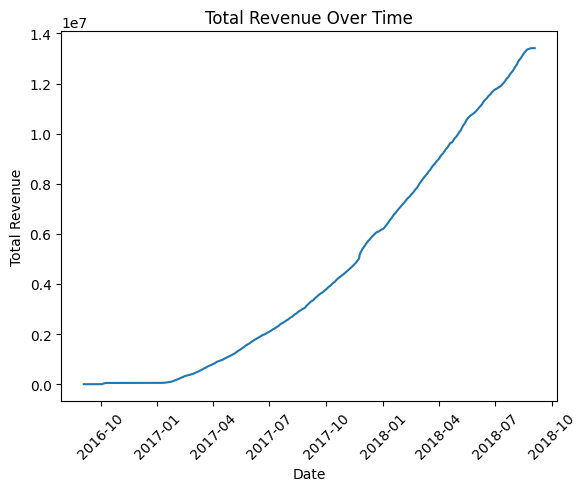

In [132]:
# plot daily total revenue over time
daily_total_revenue.plot(title="Total Revenue Over Time", xlabel="Date", ylabel="Total Revenue")
plt.xticks(rotation=45)
plt.show()

In [133]:
print(f"Total Reveneue: {daily_total_revenue.tail(1).values[0]}")

Total Reveneue: 13413241.290013107


### Pertanyaan 2: What are the trends in purchases (by revenue)?

In [134]:
# group by purchase date and get the sum of price
daily_revenue = order_items_df.groupby(order_items_df['order_purchase_timestamp'].dt.date)['price'].sum()

daily_revenue.head()

order_purchase_timestamp
2016-09-04     72.89
2016-09-05     59.50
2016-09-15    134.97
2016-10-02    100.00
2016-10-03    463.48
Name: price, dtype: float64

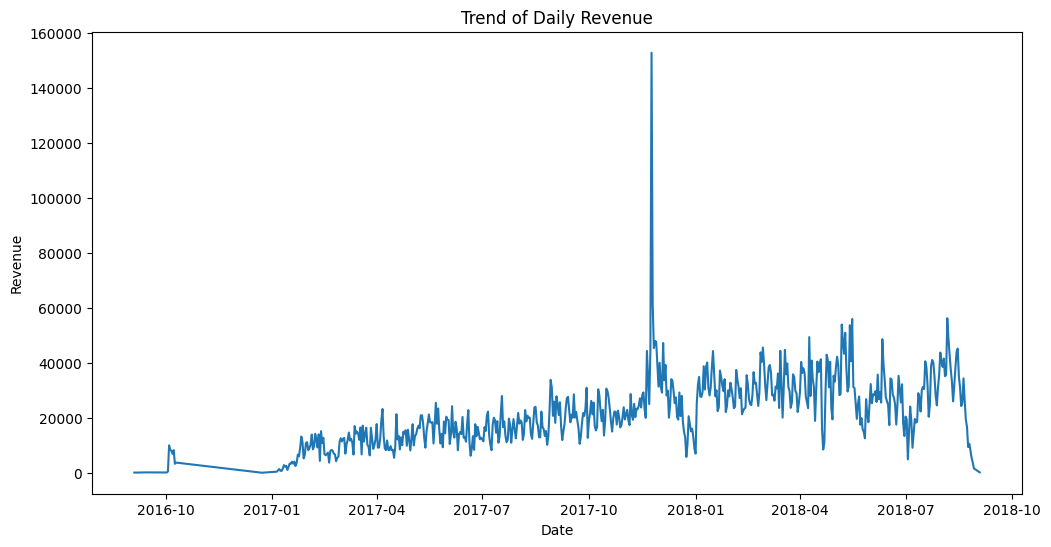

In [135]:
# plot daily revenue
daily_revenue.plot(title="Trend of Daily Revenue", xlabel="Date", ylabel="Revenue", figsize=(12,6))
plt.show()

In [136]:
# group by purchase month and get the sum of price
monthly_revenue = order_items_df.groupby(order_items_df['order_purchase_timestamp'].dt.to_period('M'))['price'].sum()

monthly_revenue.head()

order_purchase_timestamp
2016-09       267.36
2016-10     48833.42
2016-12        10.90
2017-01    119754.92
2017-02    246796.53
Freq: M, Name: price, dtype: float64

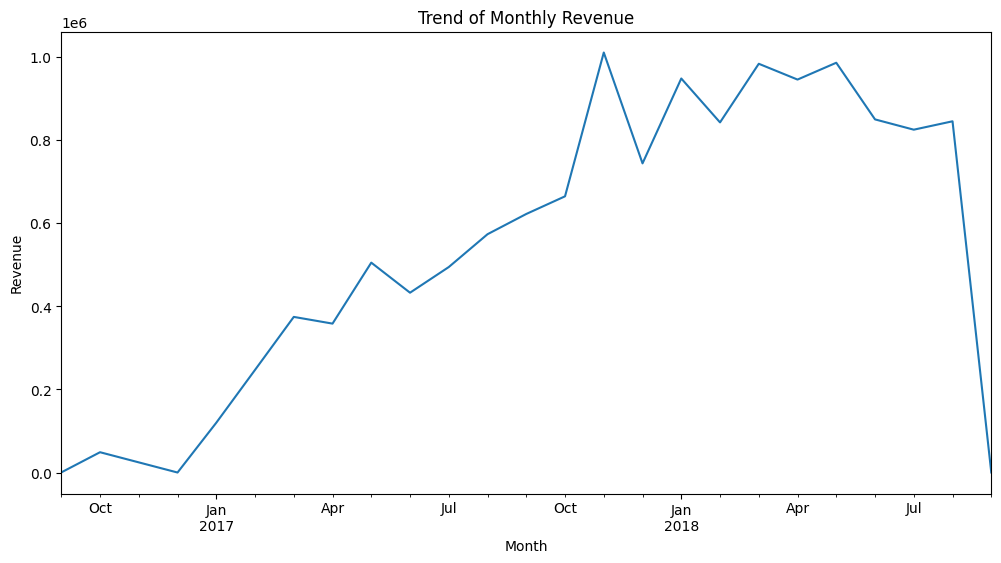

In [137]:
# plot monthly revenue
monthly_revenue.plot(title="Trend of Monthly Revenue", xlabel="Month", ylabel="Revenue", figsize=(12,6))
plt.show()

### Pertanyaan 3: What are the trends in purchases (by total order)?

In [138]:
# group by purchase date and get the count of orders
daily_total_order = orders_df.groupby(orders_df['order_purchase_timestamp'].dt.date).size()
daily_total_order.head()

order_purchase_timestamp
2016-09-04    1
2016-09-05    1
2016-09-13    1
2016-09-15    1
2016-10-02    1
dtype: int64

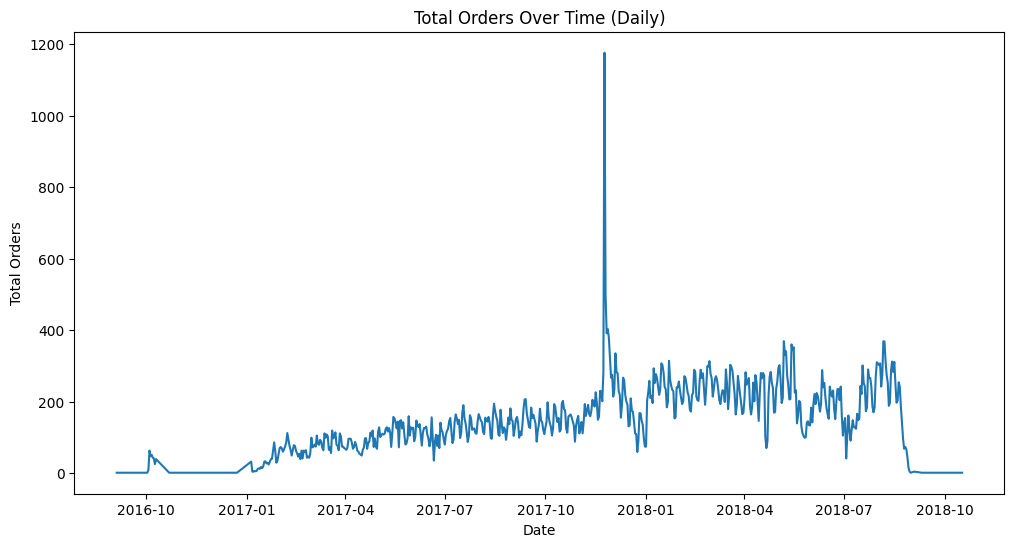

In [139]:
# plot daily total order
daily_total_order.plot(title="Total Orders Over Time (Daily)", xlabel="Date", ylabel="Total Orders", figsize=(12,6))
plt.show()

In [140]:
# group by purchase month and get the count of orders
monthly_total_order = orders_df.groupby(orders_df['order_purchase_timestamp'].dt.to_period('M')).size()
monthly_total_order.head()

order_purchase_timestamp
2016-09       4
2016-10     319
2016-12       1
2017-01     796
2017-02    1777
Freq: M, dtype: int64

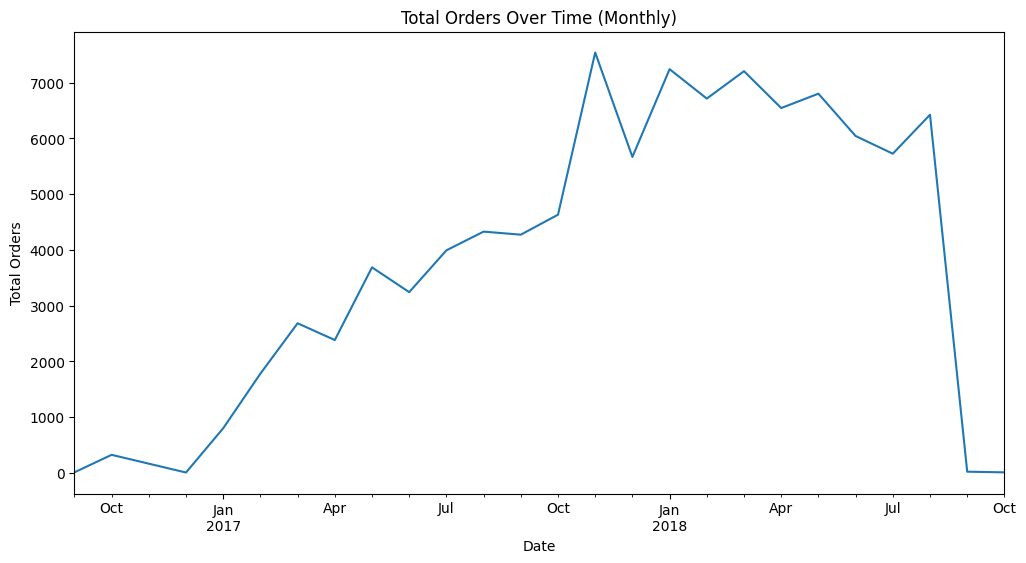

In [141]:
# plot monthly total order
monthly_total_order.plot(title="Total Orders Over Time (Monthly)", xlabel="Date", ylabel="Total Orders", figsize=(12,6))
plt.show()

### Pertanyaan 4: Which product categories contribute the most to revenue?

In [142]:
# merge order_items_df with products_df to get product category info
order_items_df = order_items_df.merge(products_df[['product_id', 'product_category_name']], on='product_id')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,total_revenue,product_category_name
0,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,2016-09-04 21:15:19,39.99,furniture_decor
1,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,2016-09-04 21:15:19,72.89,furniture_decor
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56,2016-09-05 00:15:34,132.39,telephony
3,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,2016-09-15 12:16:38,177.38,health_beauty
4,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,2016-09-15 12:16:38,222.37,health_beauty


In [143]:
# calculate total revenue by product category
categories_revenue = order_items_df.groupby('product_category_name')['price'].sum().sort_values(ascending=False)
categories_revenue.head()

product_category_name
health_beauty            1237021.73
watches_gifts            1189625.57
bed_bath_table           1021197.30
sports_leisure            977354.50
computers_accessories     900556.02
Name: price, dtype: float64

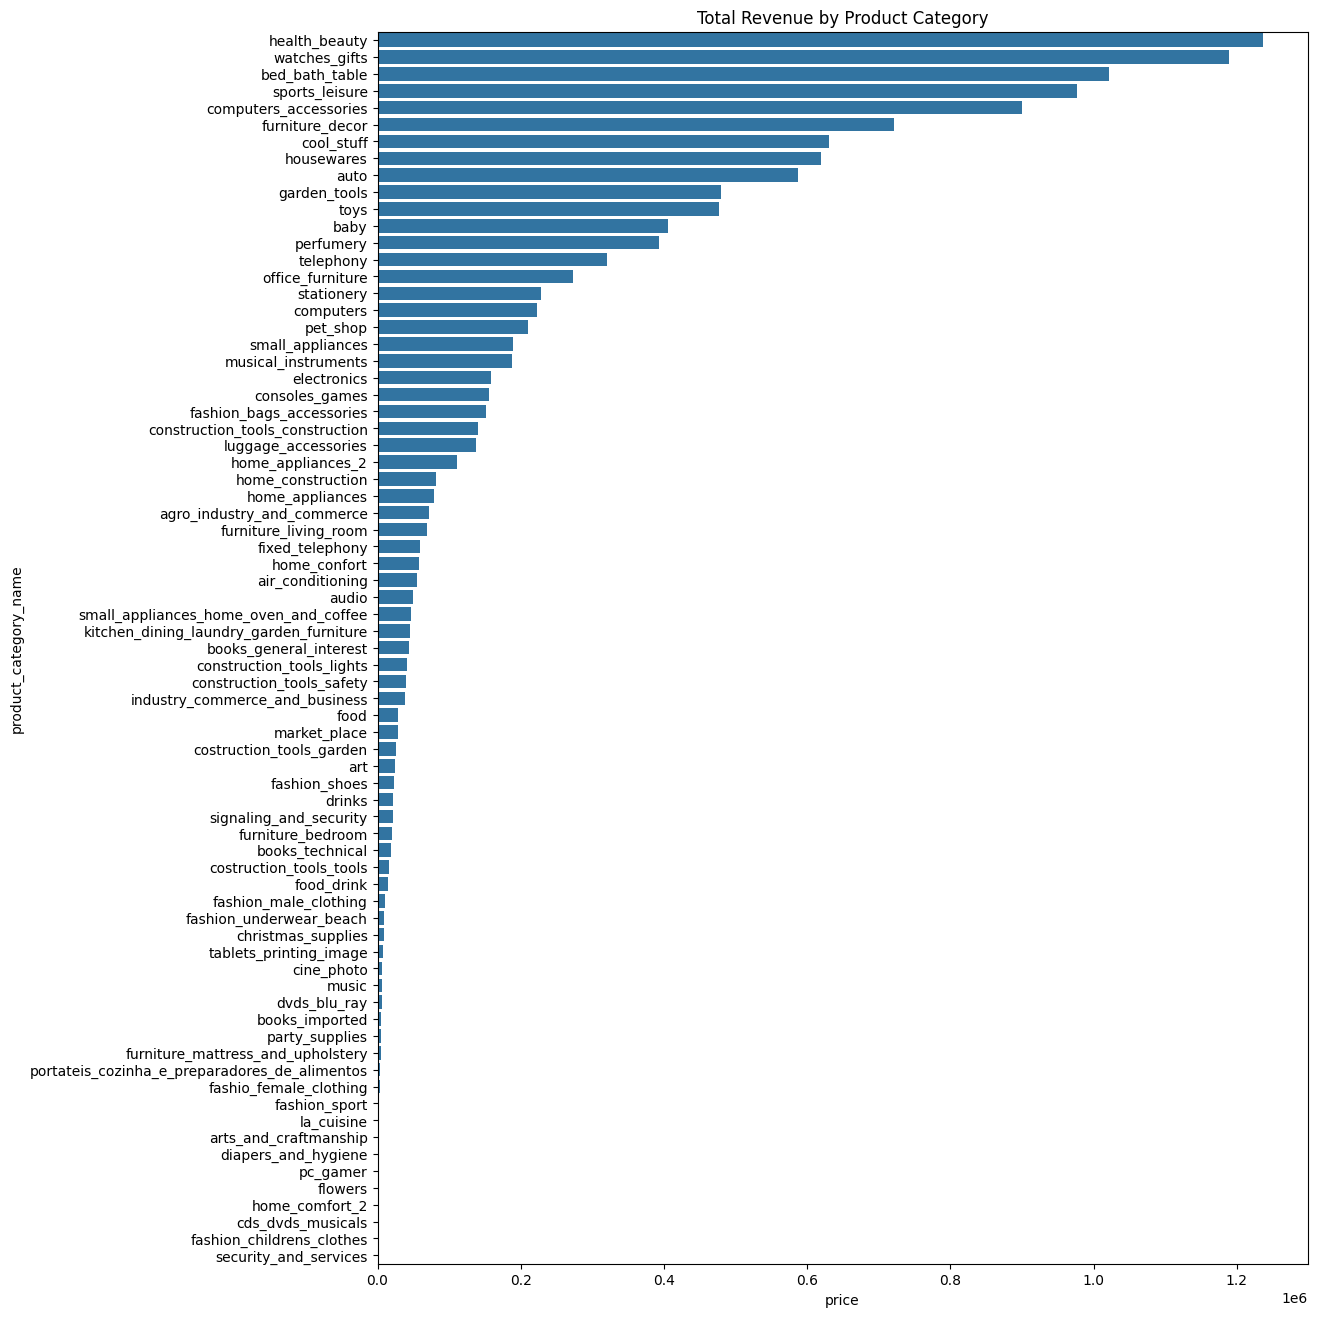

In [144]:
# plot total revenue by product category
plt.figure(figsize=(12,16))
sns.barplot(x=categories_revenue, y=categories_revenue.index, orient='h')
plt.title("Total Revenue by Product Category")
plt.show()

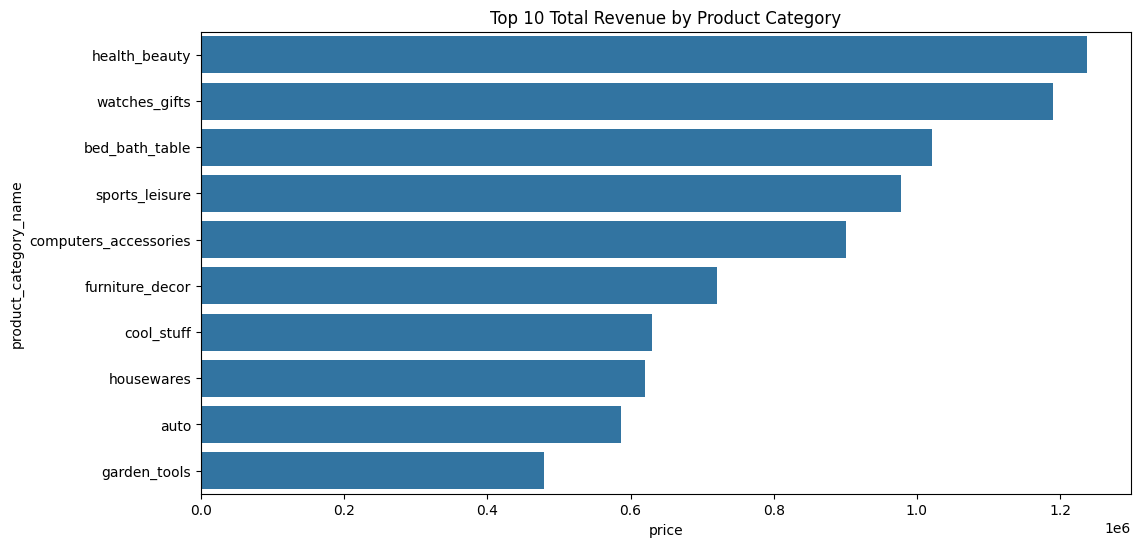

In [145]:
# limiting the plot to top 10 categories
plt.figure(figsize=(12,6))
sns.barplot(x=categories_revenue[:10], y=categories_revenue[:10].index, orient='h')
plt.title("Top 10 Total Revenue by Product Category")
plt.show()

### Pertanyaan 5: Which product categories is the most selling?

In [146]:
# seeing the distribution of product category
category_sold = order_items_df['product_category_name'].value_counts()
category_sold.head()

product_category_name
bed_bath_table           10943
health_beauty             9501
sports_leisure            8543
furniture_decor           8228
computers_accessories     7729
Name: count, dtype: int64

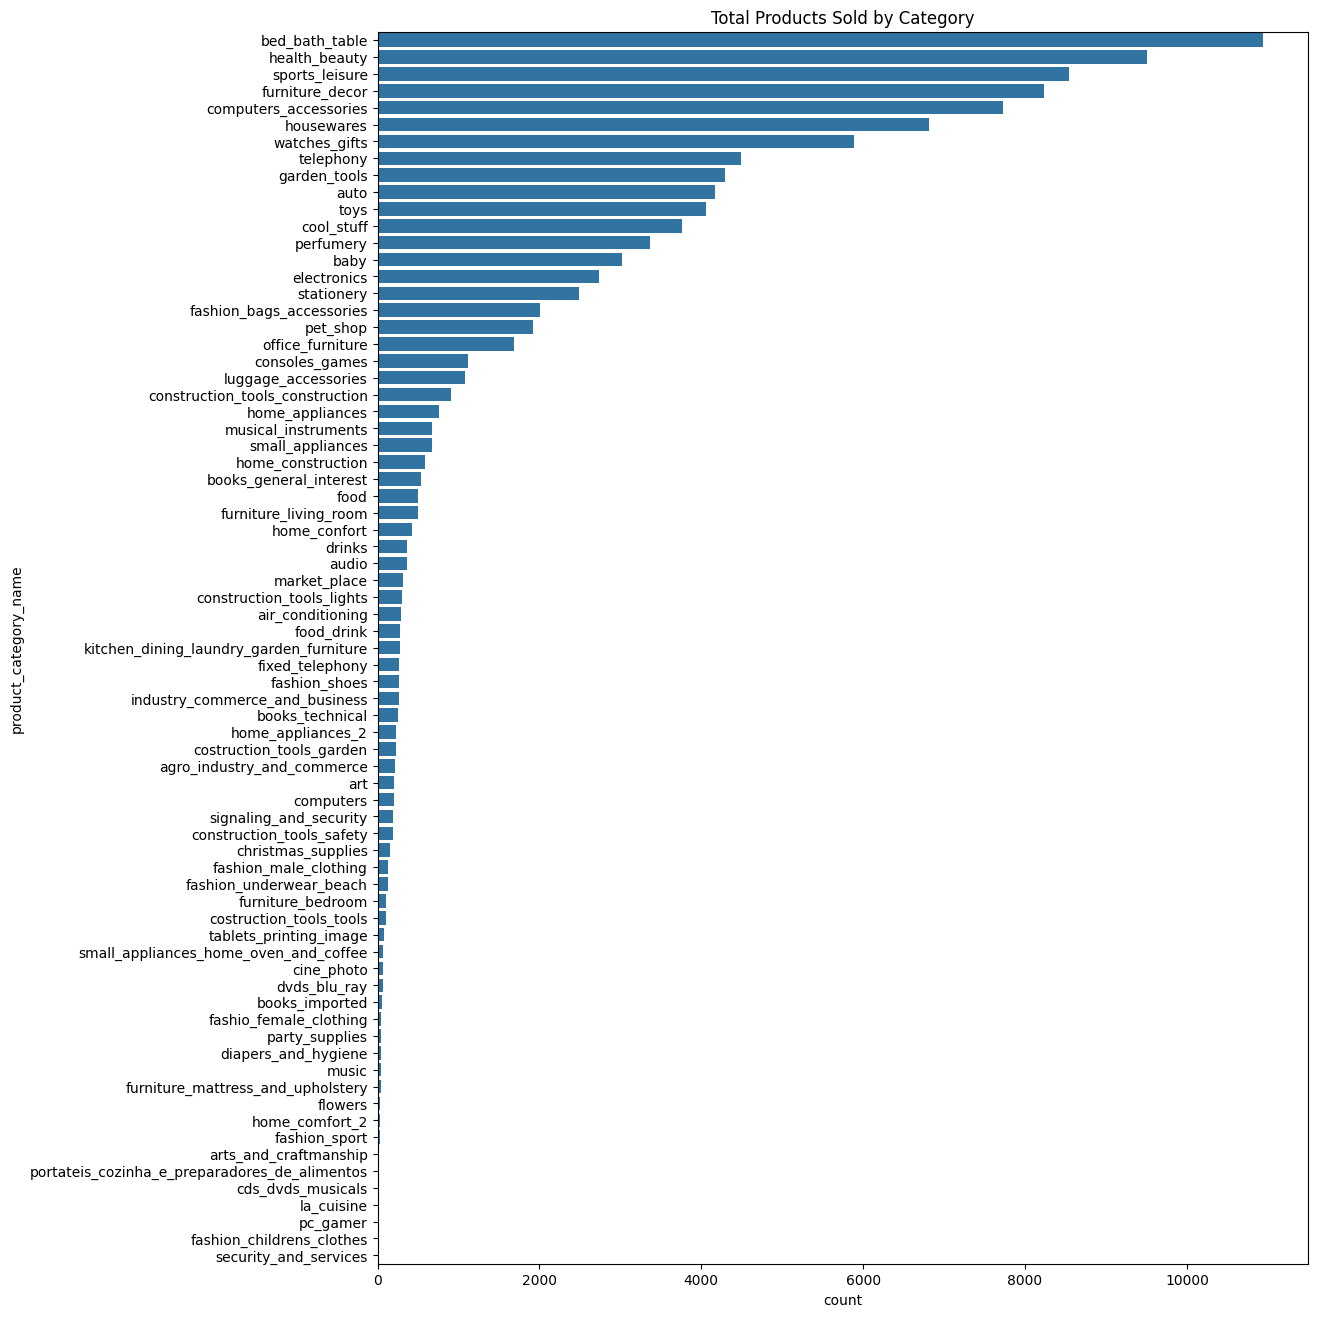

In [147]:
# plot total products sold by category
plt.figure(figsize=(12,16))
sns.barplot(x=category_sold, y=category_sold.index, orient='h')
plt.title("Total Products Sold by Category")
plt.show()

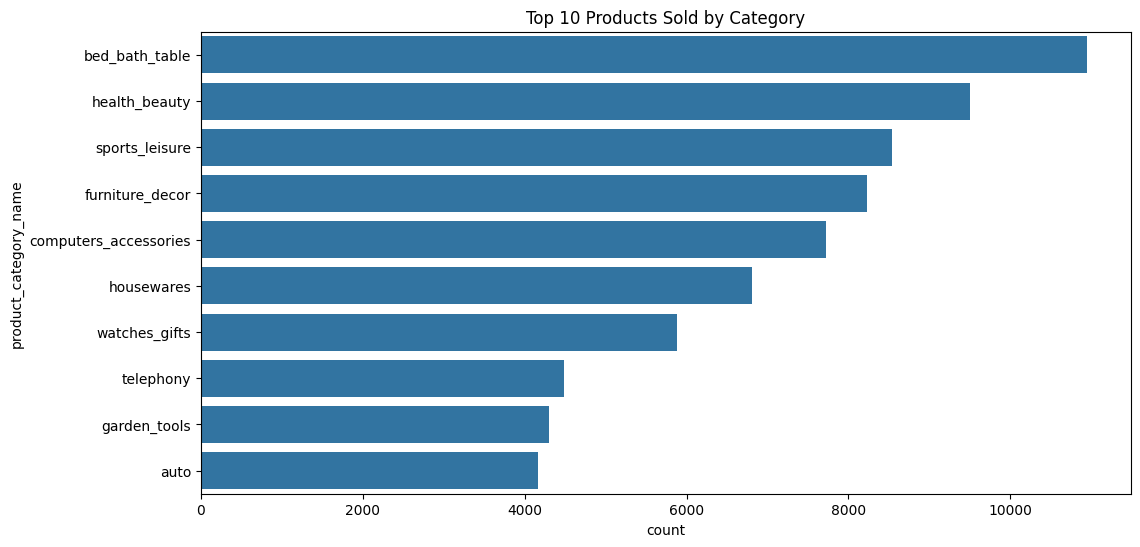

In [148]:
# limiting the plot to top 10 categories
plt.figure(figsize=(12,6))
sns.barplot(x=category_sold[:10], y=category_sold[:10].index, orient='h')
plt.title("Top 10 Products Sold by Category")
plt.show()

### Pertanyaan 6: Which states or cities have the highest number of orders?

In [149]:
# merge orders_df with customers_df to get customer info (city, state)
orders_df = orders_df.merge(customers_df[['customer_id', 'customer_city', 'customer_state']], on='customer_id')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_to_approved,approved_to_delivered_carrier,approved_to_delivered_customer,delivered_carrier_to_delivered_customer,customer_city,customer_state
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-25 15:38:31,2016-10-20,32 days 16:02:44,10 days 23:56:48,18 days 02:20:28,7 days 02:23:40,boa vista,RR
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,32 days 13:01:41,NaT,NaT,NaT,passo fundo,RS
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,23 days 21:52:27,NaT,NaT,NaT,sao jose dos campos,SP
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,0 days 00:00:00,53 days 04:55:15,54 days 19:31:00,1 days 14:35:45,sao joaquim da barra,SP
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25,3 days 17:43:04,NaT,NaT,NaT,sao paulo,SP


In [150]:
# group by customer city and get the count of orders
order_by_cities = orders_df.groupby('customer_city').size().sort_values(ascending=False)
order_by_cities.head()

customer_city
sao paulo         15311
rio de janeiro     6799
belo horizonte     2730
brasilia           2092
curitiba           1496
dtype: int64

In [151]:
order_by_cities

customer_city
sao paulo         15311
rio de janeiro     6799
belo horizonte     2730
brasilia           2092
curitiba           1496
                  ...  
rio doce              1
ibiajara              1
ibiara                1
ibicuitinga           1
erere                 1
Length: 4100, dtype: int64

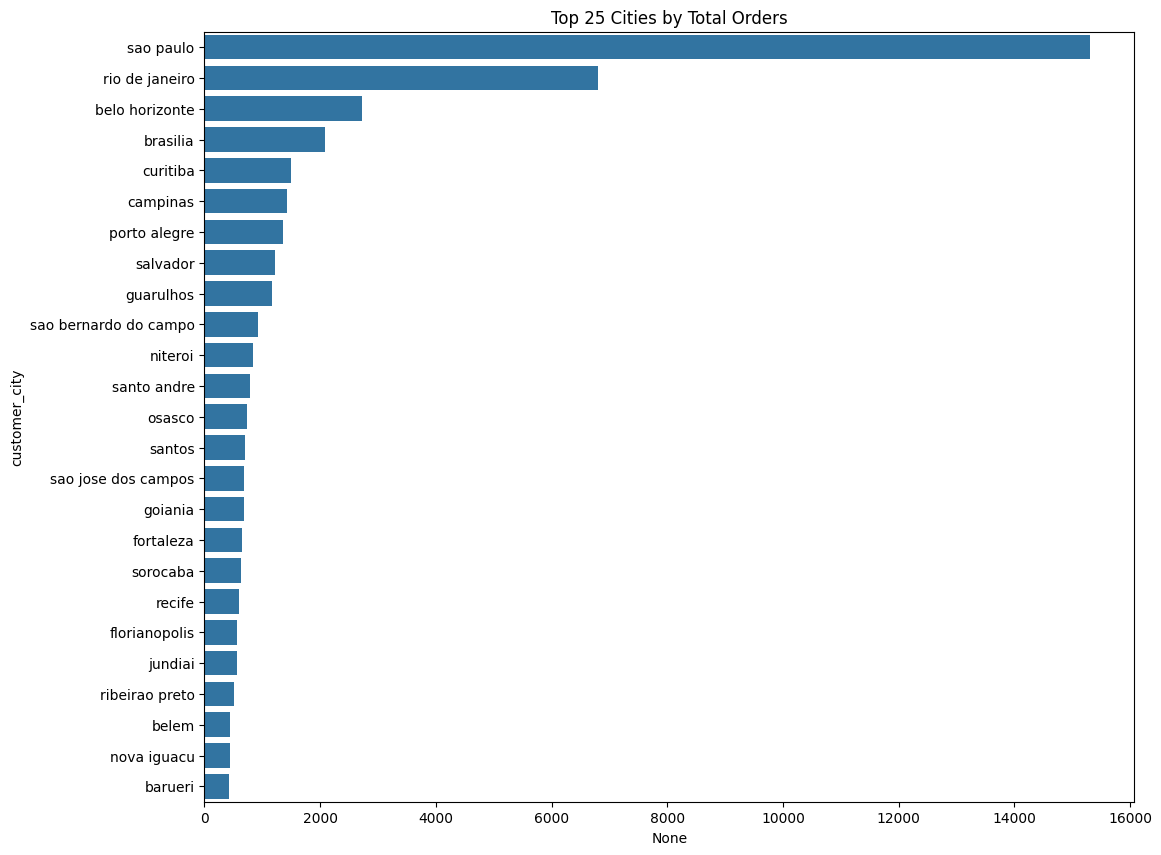

In [152]:
# plot total orders by city (top 25)
plt.figure(figsize=(12,10))
sns.barplot(x=order_by_cities[:25], y=order_by_cities[:25].index, orient='h')
plt.title("Top 25 Cities by Total Orders")
plt.show()

In [153]:
# group by customer state and get the count of orders
order_by_states = orders_df.groupby('customer_state').size().sort_values(ascending=False)
order_by_states.head()

customer_state
SP    41152
RJ    12709
MG    11468
RS     5383
PR     4964
dtype: int64

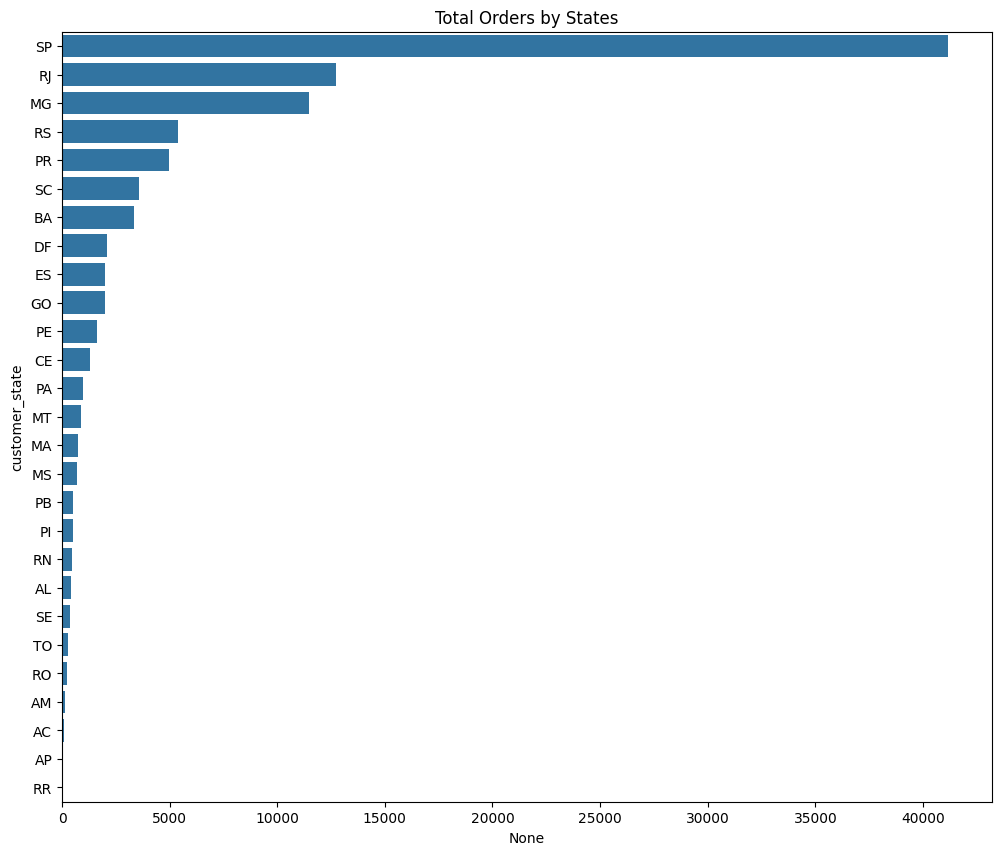

In [154]:
# plot total orders by state
plt.figure(figsize=(12,10))
sns.barplot(x=order_by_states, y=order_by_states.index, orient='h')
plt.title("Total Orders by States")
plt.show()

### Pertanyaan 7: What is the distribution of payment methods used by customers?

In [155]:
order_payments_df['payment_type'].value_counts(normalize=True)

payment_type
credit_card    0.739219
boleto         0.190443
voucher        0.055591
debit_card     0.014718
not_defined    0.000029
Name: proportion, dtype: float64

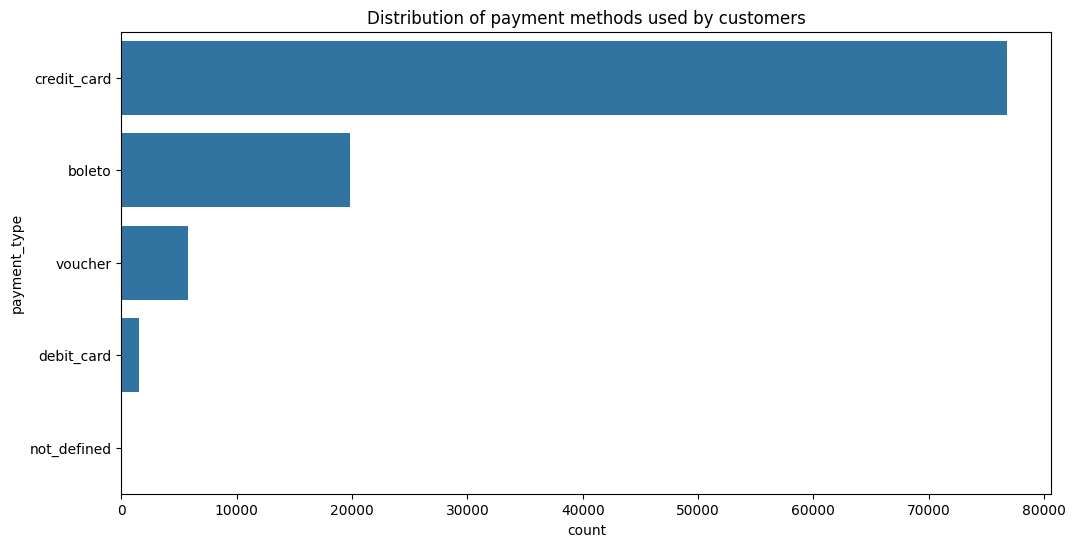

In [156]:
# plot the distribution of payment methods used by customers
plt.figure(figsize=(12,6))
sns.countplot(order_payments_df['payment_type'])
plt.title("Distribution of payment methods used by customers")
plt.show()

**Insight:**
1. Total revenue generated over time is R$ 13413241.29. From the plot we can also see that the trend in revenue generation is preaty steady.
2. Trend of revenue is rather fluctuating and there is no clear pattern. The highest revenue ever generated is in November 2017, followed by May 2018, and March 2018.
3. Trend of products sold is also fluctuating and there is no clear pattern. The highest number of products sold is in November 2017, followed by January 2018, and March 2018.
4. The most contributing categories to revenue is health_beauty (R$ 1237021.73), followed closely by watches_gifts (R$ 1189625.57). The top 10 total revenue generating categories is as follows: health_beauty, watches_gifts, bed_bath_table, sports_leisure, computers_accessories, furniture_decor, cool_stuff, housewares, auto, garden_tools.
5. Category with the most products sold is bed_bath_table (10943 items). The top 10 products sold by category is as follows: bed_bath_table, health_beauty, sports_leisure, furniture_decor, computers_accessories, housewares, watches_gifts, telephony, garden_tools, auto.
6. There are a total of 4100 cities by which the orders has come from. Most of the orders comes from the city of Sao Paulo (15311 orders), and then Rio de Janeiro has less than a half of total order of Sao Paulo (6799 orders), and the rest of the cities has significant differences between these top two cities. By the states, the state with the most orders is SP and then there is a dramatic differences between other states.
7. Most customers (74%) use credit card as their choosen form of payment, followed by boleto (19%), voucher (6%), and then debit card (1%).

## Analisis Lanjutan (Opsional) - RFM Analysis

In [157]:
# get total payment by order
total_payment = order_payments_df.groupby('order_id')['payment_value'].sum().sort_values(ascending=False)
total_payment.head()

order_id
03caa2c082116e1d31e67e9ae3700499    13664.08
736e1922ae60d0d6a89247b851902527     7274.88
0812eb902a67711a1cb742b3cdaa65ae     6929.31
fefacc66af859508bf1a7934eab1e97f     6922.21
f5136e38d1a14a4dbd87dff67da82701     6726.66
Name: payment_value, dtype: float64

In [158]:
# merge orders_df with customers_df to get customer unique id
orders_df = orders_df.merge(customers_df[['customer_id', 'customer_unique_id']], on='customer_id')

# merege orders_df with total payment
orders_df = orders_df.merge(total_payment, on='order_id', how='left')

orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_to_approved,approved_to_delivered_carrier,approved_to_delivered_customer,delivered_carrier_to_delivered_customer,customer_city,customer_state,customer_unique_id,payment_value
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-25 15:38:31,2016-10-20,32 days 16:02:44,10 days 23:56:48,18 days 02:20:28,7 days 02:23:40,boa vista,RR,b7d76e111c89f7ebf14761390f0f7d17,136.23
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,32 days 13:01:41,NaT,NaT,NaT,passo fundo,RS,4854e9b3feff728c13ee5fc7d1547e92,75.06
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,23 days 21:52:27,NaT,NaT,NaT,sao jose dos campos,SP,009b0127b727ab0ba422f6d9604487c7,40.95
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,0 days 00:00:00,53 days 04:55:15,54 days 19:31:00,1 days 14:35:45,sao joaquim da barra,SP,830d5b7aaa3b6f1e9ad63703bec97d23,NaN
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25,3 days 17:43:04,NaT,NaT,NaT,sao paulo,SP,0eb1ee9dba87f5b36b4613a65074337c,109.34


In [159]:
# Get latest date in the dataset to be used as reference
reference_date = orders_df['order_purchase_timestamp'].max()

In [160]:
# Calculate RFM metrics
rfm = orders_df.groupby('customer_unique_id').agg(
    Recency=('order_purchase_timestamp', lambda x: (reference_date - x.max()).days),
    Frequency=('order_id', 'count'),
    Monetary=('payment_value', 'sum')
).reset_index()

print(rfm.head())

                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     27.19
2  0000f46a3911fa3c0805444483337064      585          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      336          1    196.89


In [161]:
# see the statistics of recency, frequency, and monetary
rfm.describe()

,Recency,Frequency,Monetary
count,94769.000000,94769.000000,94769.000000
mean,289.594667,1.034610,166.695334
std,153.187343,0.214012,231.884057
min,0.000000,1.000000,0.000000
25%,166.000000,1.000000,63.100000
50%,271.000000,1.000000,108.000000
75%,398.000000,1.000000,183.600000
max,772.000000,17.000000,13664.080000


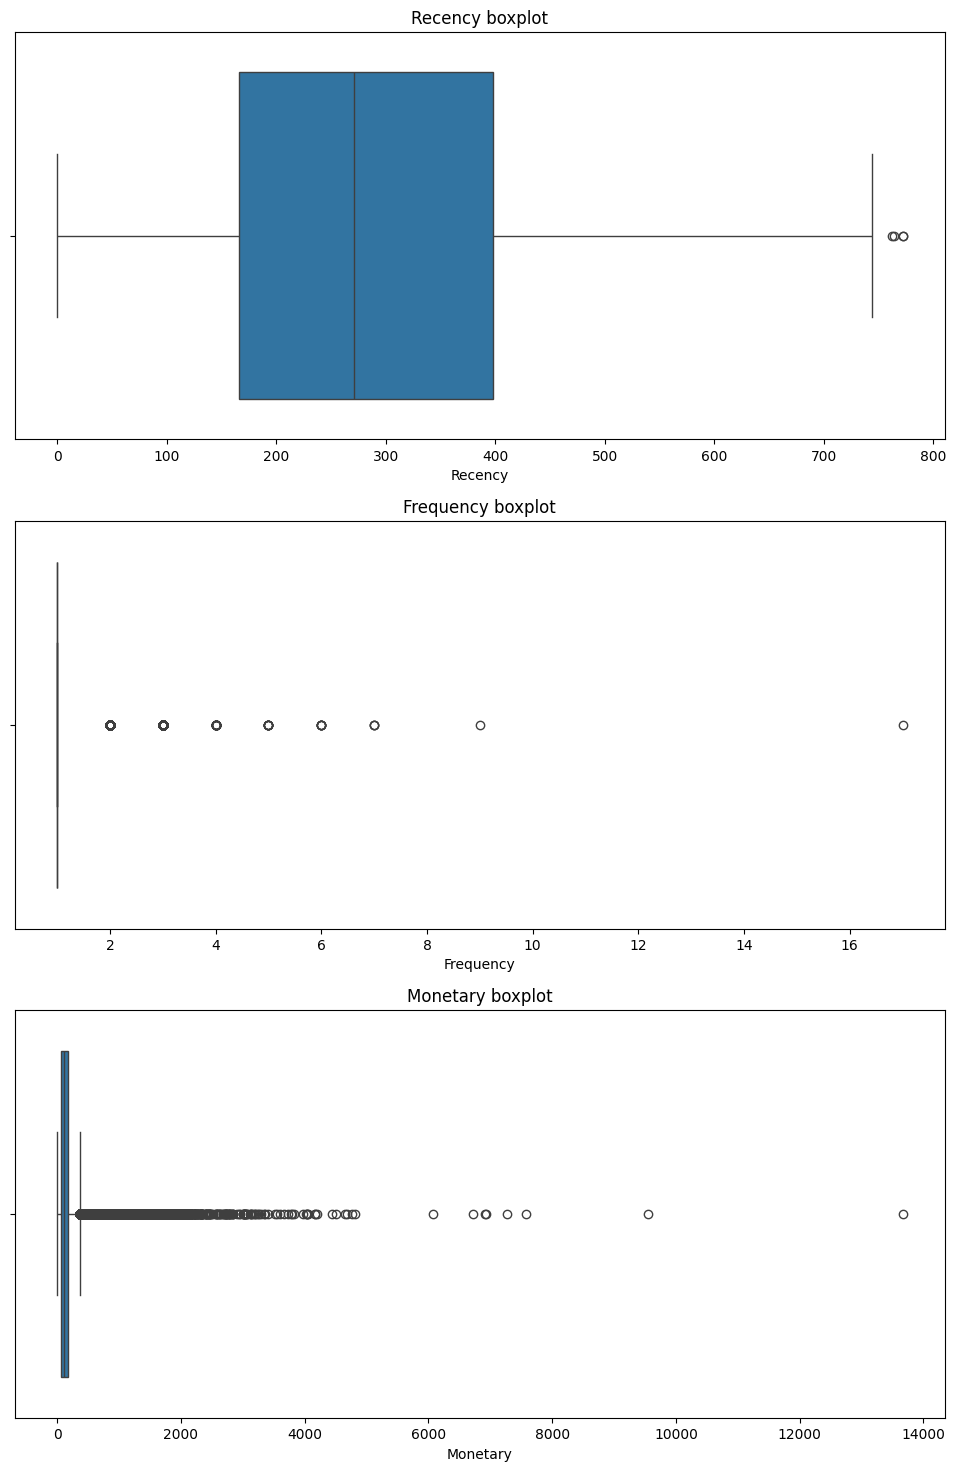

In [162]:
create_boxplot(rfm)

In [163]:
# get the top 10 customers based on recency, frequency, and monetary
top_10_recency = rfm.sort_values(by='Recency', ascending=True)[:10]
top_10_frequency = rfm.sort_values(by='Frequency', ascending=False)[:10]
top_10_monetary = rfm.sort_values(by='Monetary', ascending=False)[:10]

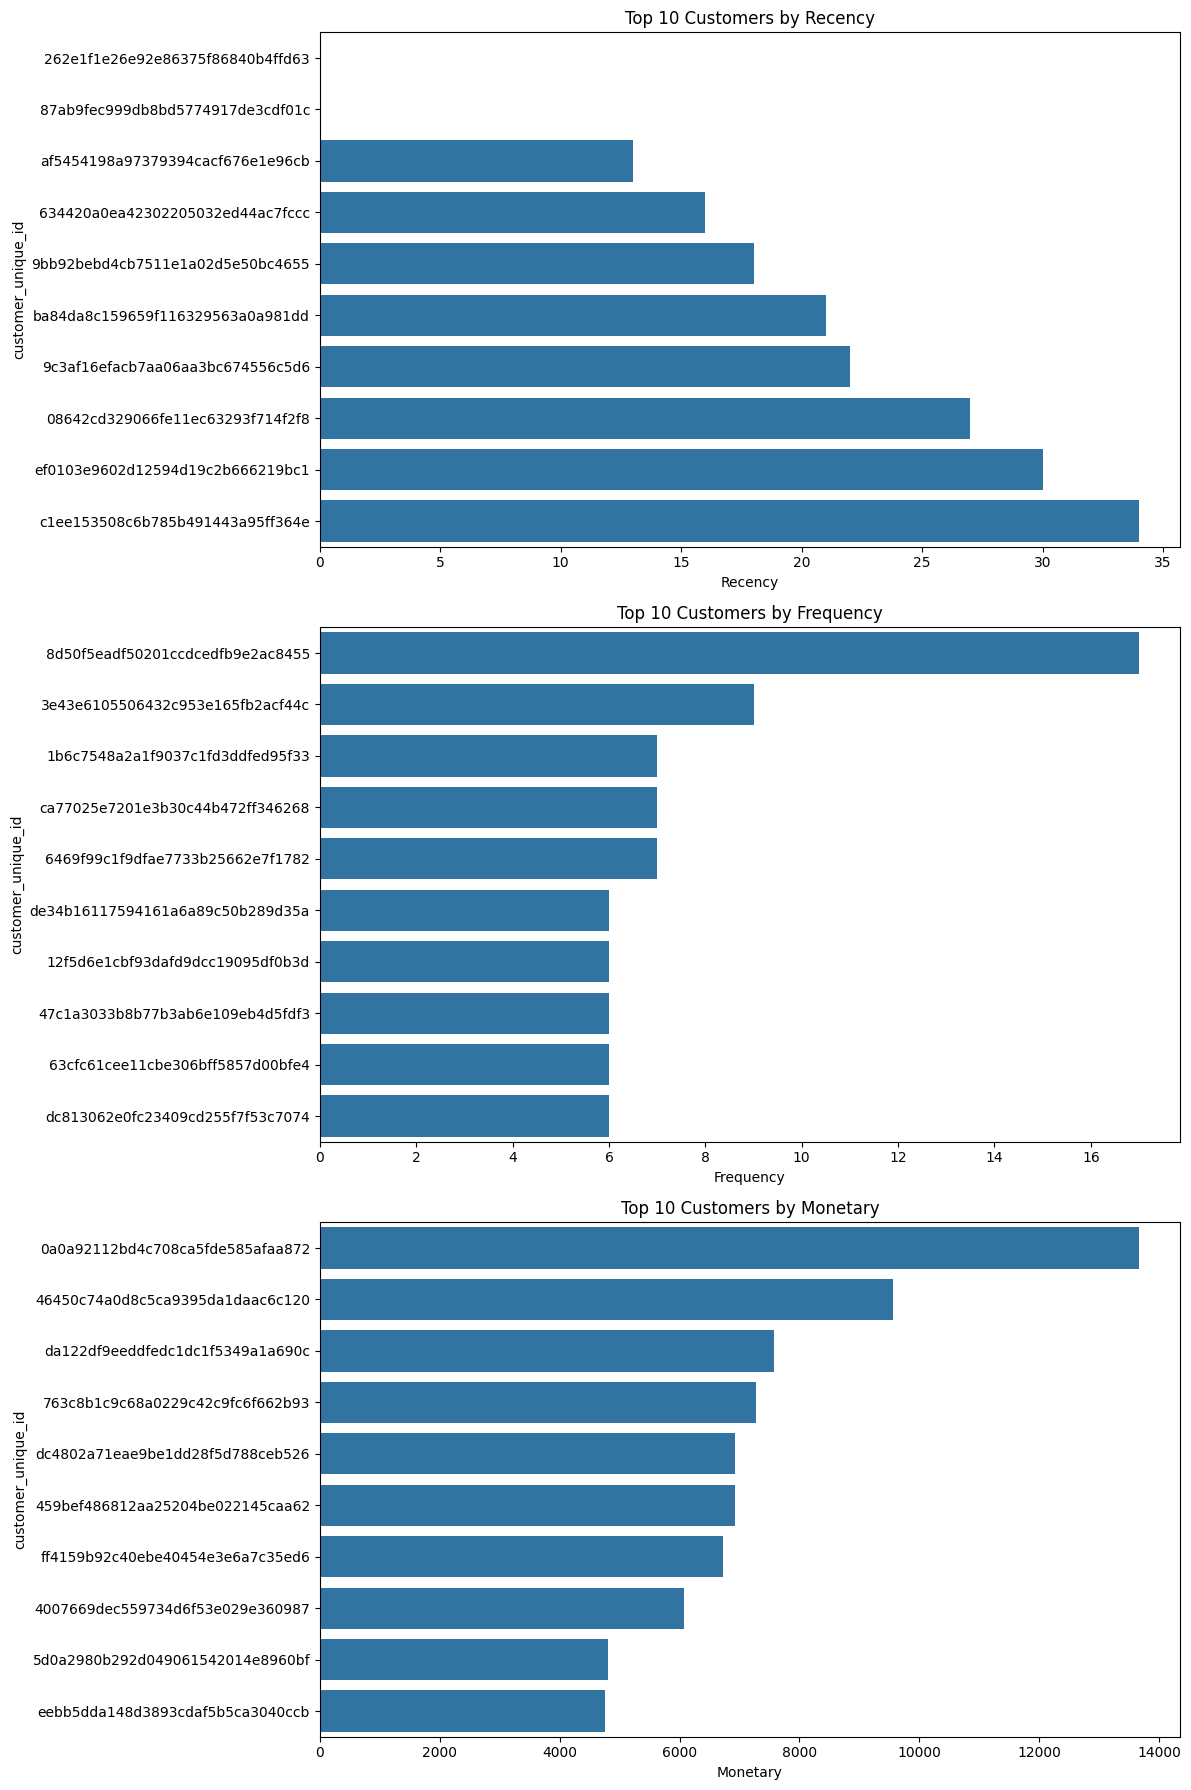

In [164]:
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

sns.barplot(x=top_10_recency['Recency'], y=top_10_recency['customer_unique_id'], ax=axes[0])
axes[0].set_title("Top 10 Customers by Recency")

sns.barplot(x=top_10_frequency['Frequency'], y=top_10_frequency['customer_unique_id'], ax=axes[1])
axes[1].set_title("Top 10 Customers by Frequency")

sns.barplot(x=top_10_monetary['Monetary'], y=top_10_monetary['customer_unique_id'], ax=axes[2])
axes[2].set_title("Top 10 Customers by Monetary")

plt.tight_layout()
plt.show()

**Insight**
1. Recency
    - The statistics for recency is as follows:
        - Mean: 290 days
        - Median: 271 days
        - Range: 0 - 772 days
    - From the statistics above we can draw a conclusion that most customers haven't purchased in a long time. A recency of 0 indicates some recent purchases, but the average and median show that the majority of customers have been inactive for around 9 months. This suggests limited customer retention or re-engagement.
    - Even in the top 10 customers by recency, ignoring the first 2 customers, the range of recency is ~ 15 - 35 days, this further support the previous point that there is a retention issue.
2. Frequency
    - The statistics for frequency is as follows:
        - Mean: 1.03
        - Median: 1
        - Range: 1 - 17
    - From the statistics above we can draw a conclusion that the majority of customers only do single-purchase. Improving customer loyalty could be a business opportunity.
3. Monetary
    - The statistics for monetary is as follows:
        - Mean: R$ 166.70
        - Median: R$ 108.00
        - Range: R$ 0 - R$ 13664
        - Std dev: 231.88
    - From the statistics above we can draw a conclusion that there's a significant spending gap between top spenders and typical customers:
        - Most customers spend between R$ 63.10 and R$ 183.60
        - The high standard deviation and max value suggest a small group of very high-value customers
        - This points to the potential of segmenting VIP customers for targeted marketing or rewards.

## Conclusion

- Conclusion pertanyaan 1: What is the total revenue generated from sales over time?

    The total revenue generated over time is R$ 13413241.29.


- Conclusion pertanyaan 2: What are the trends in purchases (by revenue)?

    Trend of revenue is rather fluctuating and there is no clear pattern. The highest revenue ever generated is in November 2017, followed by May 2018, and March 2018.

- Conclusion pertanyaan 3: What are the trends in purchases (by order number)?

    Trend of products sold is also fluctuating and there is no clear pattern. The highest number of products sold is in November 2017, followed by January 2018, and March 2018.

- Conclusion pertanyaan 4: Which product categories contribute the most to revenue?

    The most contributing categories to revenue is health_beauty (R$ 1237021.73), followed closely by watches_gifts (R$ 1189625.57). The top 10 total revenue generating categories is as follows: health_beauty, watches_gifts, bed_bath_table, sports_leisure, computers_accessories, furniture_decor, cool_stuff, housewares, auto, garden_tools.

- Conclusion pertanyaan 5: Which product categories is the most selling?

    Category with the most products sold is bed_bath_table (10943 items). The top 10 products sold by category is as follows: bed_bath_table, health_beauty, sports_leisure, furniture_decor, computers_accessories, housewares, watches_gifts, telephony, garden_tools, auto.

- Conclusion pertanyaan 6: Which states or cities have the highest number of orders?

    There are a total of 4100 cities by which the orders has come from. Most of the orders comes from the city of Sao Paulo (15311 orders), and then Rio de Janeiro has less than a half of total order of Sao Paulo (6799 orders), and the rest of the cities has significant differences between these top two cities. By the states, the state with the most orders is SP and then there is a dramatic differences between other states.

- Conclusion pertanyaan 7: What is the distribution of payment methods used by customers?

    Most customers (74%) use credit card as their choosen form of payment, followed by boleto (19%), voucher (6%), and then debit card (1%).

## Exporting data for dashboard

In [165]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchased_to_approved,approved_to_delivered_carrier,approved_to_delivered_customer,delivered_carrier_to_delivered_customer,customer_city,customer_state,customer_unique_id,payment_value
0,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,2016-10-25 15:38:31,2016-10-20,32 days 16:02:44,10 days 23:56:48,18 days 02:20:28,7 days 02:23:40,boa vista,RR,b7d76e111c89f7ebf14761390f0f7d17,136.23
1,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28,32 days 13:01:41,NaT,NaT,NaT,passo fundo,RS,4854e9b3feff728c13ee5fc7d1547e92,75.06
2,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30,23 days 21:52:27,NaT,NaT,NaT,sao jose dos campos,SP,009b0127b727ab0ba422f6d9604487c7,40.95
3,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,0 days 00:00:00,53 days 04:55:15,54 days 19:31:00,1 days 14:35:45,sao joaquim da barra,SP,830d5b7aaa3b6f1e9ad63703bec97d23,NaN
4,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25,3 days 17:43:04,NaT,NaT,NaT,sao paulo,SP,0eb1ee9dba87f5b36b4613a65074337c,109.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98044,392ed9afd714e3c74767d0c4d3e3f477,2823ffda607a2316375088e0d00005ec,canceled,2018-09-29 09:13:03,NaT,NaT,NaT,2018-10-15,NaT,NaT,NaT,NaT,guarulhos,SP,9bb92bebd4cb7511e1a02d5e50bc4655,137.03
98045,616fa7d4871b87832197b2a137a115d2,bf6181a85bbb4115736c0a8db1a53be3,canceled,2018-10-01 15:30:09,NaT,NaT,NaT,2018-10-23,NaT,NaT,NaT,NaT,pirai,RJ,634420a0ea42302205032ed44ac7fccc,80.38
98046,a2ac6dad85cf8af5b0afb510a240fe8c,4c2ec60c29d10c34bd49cb88aa85cfc4,canceled,2018-10-03 18:55:29,NaT,NaT,NaT,2018-10-16,NaT,NaT,NaT,NaT,registro,SP,af5454198a97379394cacf676e1e96cb,197.55
98047,b059ee4de278302d550a3035c4cdb740,856336203359aa6a61bf3826f7d84c49,canceled,2018-10-16 20:16:02,NaT,NaT,NaT,2018-11-12,NaT,NaT,NaT,NaT,picos,PI,262e1f1e26e92e86375f86840b4ffd63,222.03


In [166]:
merged_df = order_items_df.merge(orders_df[['order_id', 'customer_unique_id', 'order_status']], on='order_id')
merged_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,total_revenue,product_category_name,customer_unique_id,order_status
0,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,39.99,31.67,2016-09-04 21:15:19,3.999000e+01,furniture_decor,b7d76e111c89f7ebf14761390f0f7d17,shipped
1,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1554a68530182680ad5c8b042c3ab563,2016-10-26 18:25:19,32.90,31.67,2016-09-04 21:15:19,7.289000e+01,furniture_decor,b7d76e111c89f7ebf14761390f0f7d17,shipped
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,a425f92c199eb576938df686728acd20,2016-09-19 00:15:34,59.50,15.56,2016-09-05 00:15:34,1.323900e+02,telephony,4854e9b3feff728c13ee5fc7d1547e92,canceled
3,bfbd0f9bdef84302105ad712db648a6c,1,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,2016-09-15 12:16:38,1.773800e+02,health_beauty,830d5b7aaa3b6f1e9ad63703bec97d23,delivered
4,bfbd0f9bdef84302105ad712db648a6c,2,5a6b04657a4c5ee34285d1e4619a96b4,ecccfa2bb93b34a3bf033cc5d1dcdc69,2016-09-19 23:11:33,44.99,2.83,2016-09-15 12:16:38,2.223700e+02,health_beauty,830d5b7aaa3b6f1e9ad63703bec97d23,delivered
...,...,...,...,...,...,...,...,...,...,...,...,...
111032,0b223d92c27432930dfe407c6aea3041,1,2b4472df15512a2825ae86fd9ae79335,67bf6941ba2f1fa1d02c375766bc3e53,2018-08-31 14:30:19,209.00,46.48,2018-08-29 14:18:23,1.341294e+07,kitchen_dining_laundry_garden_furniture,5c58de6fb80e93396e2f35642666b693,delivered
111033,168626408cb32af0ffaf76711caae1dc,1,bdcf6a834e8faa30dac3886c7a58e92e,2a84855fd20af891be03bc5924d2b453,2018-08-31 14:30:23,45.90,15.39,2018-08-29 14:18:28,1.341299e+07,health_beauty,7febafa06d9d8f232a900a2937f04338,delivered
111034,03ef5dedbe7492bdae72eec50764c43f,1,c7f27c5bef2338541c772b5776403e6a,7d7866a99a8656a42c7ff6352a433410,2018-08-31 15:05:22,24.90,8.33,2018-08-29 14:52:00,1.341301e+07,party_supplies,b701bebbdf478f5500348f03aff62121,delivered
111035,35a972d7f8436f405b56e36add1a7140,1,d04857e7b4b708ee8b8b9921163edba3,9f505651f4a6abe901a56cdc21508025,2018-08-31 15:10:26,84.99,8.76,2018-08-29 15:00:37,1.341310e+07,computers_accessories,24ac2b4327e25baf39f2119e4228976a,delivered


In [167]:
merged_df.to_csv('dashboard/main_data.csv')